In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
import seaborn as sns
from pathlib import Path

c:\Users\rodwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = kagglehub.dataset_download("vinayakshanawad/heart-rate-prediction-to-monitor-stress-level")

In [3]:
print(path)

C:\Users\rodwa\.cache\kagglehub\datasets\vinayakshanawad\heart-rate-prediction-to-monitor-stress-level\versions\1


In [4]:
p = Path(path)

train_path = p / "Train Data" / "Train Data Zip"
test_path = p / "Test Data" / "Test Zip"

train_files = list(train_path.rglob("*.csv"))
print("Arquivos de treino:", train_files)

print()

test_files = list(test_path.rglob("*.csv"))
print("Arquivos de teste:", test_files)

Arquivos de treino: [WindowsPath('C:/Users/rodwa/.cache/kagglehub/datasets/vinayakshanawad/heart-rate-prediction-to-monitor-stress-level/versions/1/Train Data/Train Data Zip/frequency_domain_features_train.csv'), WindowsPath('C:/Users/rodwa/.cache/kagglehub/datasets/vinayakshanawad/heart-rate-prediction-to-monitor-stress-level/versions/1/Train Data/Train Data Zip/heart_rate_non_linear_features_train.csv'), WindowsPath('C:/Users/rodwa/.cache/kagglehub/datasets/vinayakshanawad/heart-rate-prediction-to-monitor-stress-level/versions/1/Train Data/Train Data Zip/time_domain_features_train.csv')]

Arquivos de teste: [WindowsPath('C:/Users/rodwa/.cache/kagglehub/datasets/vinayakshanawad/heart-rate-prediction-to-monitor-stress-level/versions/1/Test Data/Test Zip/frequency_domain_features_test.csv'), WindowsPath('C:/Users/rodwa/.cache/kagglehub/datasets/vinayakshanawad/heart-rate-prediction-to-monitor-stress-level/versions/1/Test Data/Test Zip/heart_rate_non_linear_features_test.csv'), WindowsPa

De começo, trabalhando só com treino

Ajustando o treino para juntar os datasets no domínio do tempo, da frequência e não linear

In [5]:
# função para determinar o df desejado

def dataframe(dominio):
    file_desejado = [f for f in train_files if dominio in f.name.lower()][0]
    
    df_desejado = pd.read_csv(file_desejado)
    print(df_desejado.shape)
    print(df_desejado.columns)
    
    return df_desejado
    

In [6]:
# df no dominio do tempo
df_treino_tempo = dataframe("time_domain")

(369289, 20)
Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
       'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
       'KURT_REL_RR', 'SKEW_REL_RR', 'uuid'],
      dtype='object')


In [7]:
# df no dominio do frequencia
df_treino_freq = dataframe("frequency_domain")

(369289, 12)
Index(['uuid', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT',
       'HF_NU', 'TP', 'LF_HF', 'HF_LF'],
      dtype='object')


In [8]:
# df no dominio não linear
df_treino_nao_linear = dataframe("non_linear")

(369289, 7)
Index(['uuid', 'SD1', 'SD2', 'sampen', 'higuci', 'datasetId', 'condition'], dtype='object')


In [9]:
# merge dos df 
df_treino_0 = df_treino_nao_linear.merge(df_treino_freq, on='uuid', how='inner',validate='one_to_one')
df_treino = df_treino_0.merge(df_treino_tempo, on='uuid', how='inner',validate='one_to_one')

In [10]:
df = df_treino.copy()

Describe your dataset and its features, identifying the number of observations N,
number of predictor variables D, number of classes L and class-distribution (that
is, the number of observations for each of the classes).

In [12]:
df.head(5)

uuid        SD1         SD2    sampen  \
0  89df2855-56eb-4706-a23b-b39363dd605a  11.001565  199.061782  2.139754   
1  80c795e4-aa56-4cc0-939c-19634b89cbb2   9.170129  114.634458  2.174499   
2  c2d5d102-967c-487d-88f2-8b005a449f3e  11.533417  118.939253  2.135350   
3  37eabc44-1349-4040-8896-0d113ad4811f  11.119476  127.318597  2.178341   
4  aa777a6a-7aa3-4f6e-aced-70f8691dd2b7  13.590641   87.718281  2.221121   

     higuci  datasetId     condition          VLF    VLF_PCT           LF  \
0  1.163485          2     no stress  2661.894136  72.203287  1009.249419   
1  1.084711          2  interruption  2314.265450  76.975728   690.113275   
2  1.176315          2  interruption  1373.887112  51.152225  1298.222619   
3  1.179688          2     no stress  2410.357408  70.180308  1005.981659   
4  1.249612          2     no stress  1151.177330  43.918366  1421.782051   

   ...      KURT      SKEW  MEAN_REL_RR  MEDIAN_REL_RR  SDRR_REL_RR  \
0  ... -0.856554  0.335218    -0.000203      -0.000179     0.017080   
1  ... -0.408190 -0.155286    -0.000059       0.000611     0.013978   
2  ...  0.351789 -0.656813    -0.000011      -0.000263     0.018539   
3  ... -0.504947 -0.386138     0.000112       0.000494     0.017761   
4  ... -0.548408 -0.154252    -0.000100      -0.002736     0.023715   

   RMSSD_REL_RR  SDSD_REL_RR  SDRR_RMSSD_REL_RR  KURT_REL_RR  SKEW_REL_RR  
0      0.007969     0.007969           2.143342    -0.856554     0.335218  
1      0.004769     0.004769           2.930855    -0.408190    -0.155286  
2      0.008716     0.008716           2.127053     0.351789    -0.656813  
3      0.008660     0.008660           2.050988    -0.504947    -0.386138  
4      0.013055     0.013055           1.816544    -0.548408    -0.154252  

[5 rows x 37 columns]

In [13]:
df.isna().sum()

uuid                 0
SD1                  0
SD2                  0
sampen               0
higuci               0
datasetId            0
condition            0
VLF                  0
VLF_PCT              0
LF                   0
LF_PCT               0
LF_NU                0
HF                   0
HF_PCT               0
HF_NU                0
TP                   0
LF_HF                0
HF_LF                0
MEAN_RR              0
MEDIAN_RR            0
SDRR                 0
RMSSD                0
SDSD                 0
SDRR_RMSSD           0
HR                   0
pNN25                0
pNN50                0
KURT                 0
SKEW                 0
MEAN_REL_RR          0
MEDIAN_REL_RR        0
SDRR_REL_RR          0
RMSSD_REL_RR         0
SDSD_REL_RR          0
SDRR_RMSSD_REL_RR    0
KURT_REL_RR          0
SKEW_REL_RR          0
dtype: int64

In [14]:
print(df.shape)
print(df.columns)
print(df.dtypes)

print()

print(f"Numero de observacoes: {df.shape[0]}, numero de preditores: {df.shape[1] - 2}")
print(f"Numero de classes: {len(df['condition'].unique())}")

(369289, 37)
Index(['uuid', 'SD1', 'SD2', 'sampen', 'higuci', 'datasetId', 'condition',
       'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU',
       'TP', 'LF_HF', 'HF_LF', 'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD',
       'SDRR_RMSSD', 'HR', 'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR',
       'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR',
       'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR'],
      dtype='object')
uuid                  object
SD1                  float64
SD2                  float64
sampen               float64
higuci               float64
datasetId              int64
condition             object
VLF                  float64
VLF_PCT              float64
LF                   float64
LF_PCT               float64
LF_NU                float64
HF                   float64
HF_PCT               float64
HF_NU                float64
TP                   float64
LF_HF                float64
HF_LF                float64
MEAN_RR 

- Temos $N = 369.289$, $D = 35$

- Temos 37 colunas, porém uma é somente o identificador único de cada amostra e outra é uma coluna do id do dataset que está presente somente no dataset não linear. 

- Na coluna alvo "condition", temos 3 classes, que são: "no stress", "interruption" e "time pressure"

In [15]:
quantidade = df['condition'].value_counts()

pd.DataFrame({'quantidade': quantidade})

quantidade
condition                
no stress          200082
interruption       105150
time pressure       64057

Perform an unconditional mono-variate analysis of each of the D predictors. Specifically, you must plot their (unconditional) histograms and box-plots, calculate their
(unconditional) mean $µ_d$, standard deviation $σ_d$ and skewness $γ_d$, with $d = 1, . . . , D,$
using all the $N$ observations.

In [11]:
# Excluindo a coluna datasetId
df.drop('datasetId', axis=1, inplace=True)

# Seleciona apenas as colunas numéricas (excluindo 'uuid')
colunas_numericas = df.select_dtypes(include='number').columns

# calcula estatisticas
stats = pd.DataFrame({
    'Media': df[colunas_numericas].mean(),
    'Desvio padrao': df[colunas_numericas].std(),
    'Assimetria': df[colunas_numericas].skew()
})

print(stats)

                         Media  Desvio padrao  Assimetria
SD1                  10.593708       2.914795    0.399668
SD2                 154.178997     109.170222    2.363386
sampen                2.062471       0.206999   -3.091012
higuci                1.182292       0.062192    0.335008
VLF                2199.580170    1815.773422    1.960735
VLF_PCT              64.289242      16.774844   -0.410836
LF                  946.530252     574.171780    1.349076
LF_PCT               34.095182      16.040290    0.425164
LF_NU                95.566718       4.123365   -1.645603
HF                   39.245603      45.398869    2.476530
HF_PCT                1.615576       1.761073    2.021882
HF_NU                 4.433282       4.123365    1.645603
TP                 3185.356025    1923.227187    1.452435
LF_HF               115.977200     360.855129    9.781091
HF_LF                 0.048506       0.049238    2.159372
MEAN_RR             846.650104     124.603984    0.648000
MEDIAN_RR     

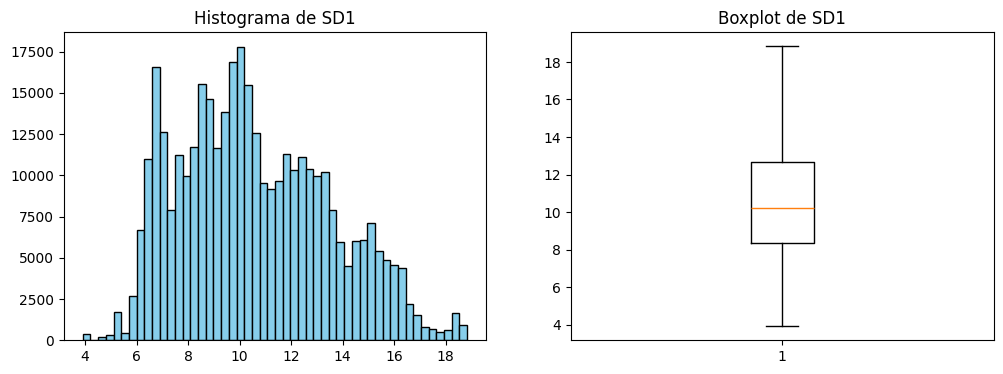

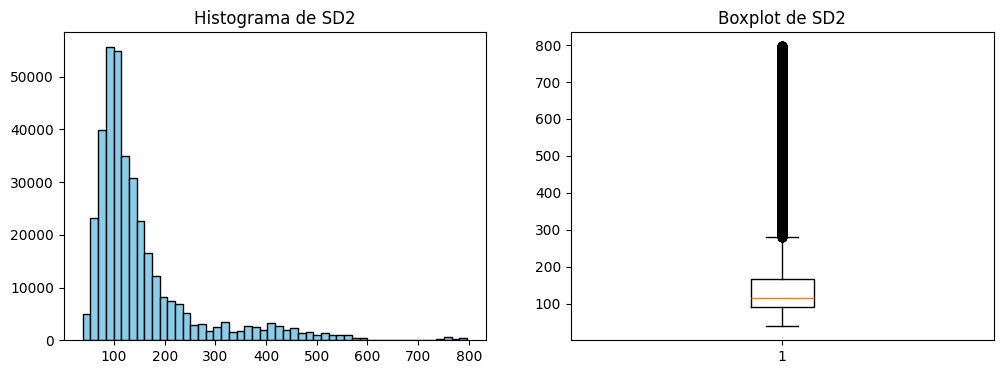

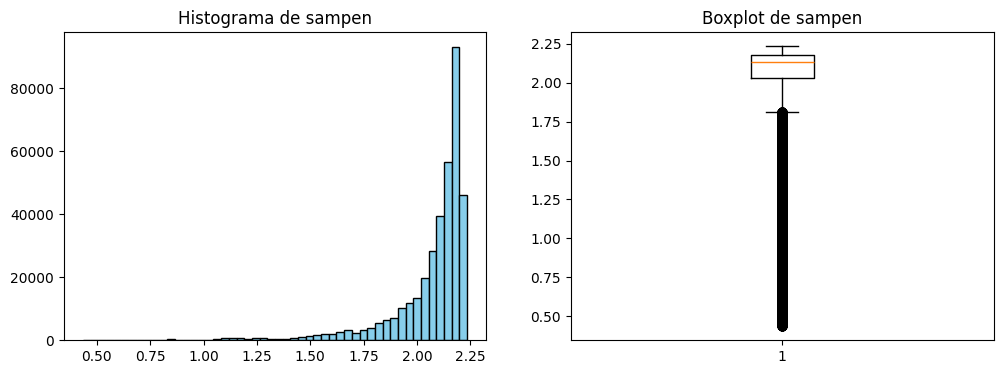

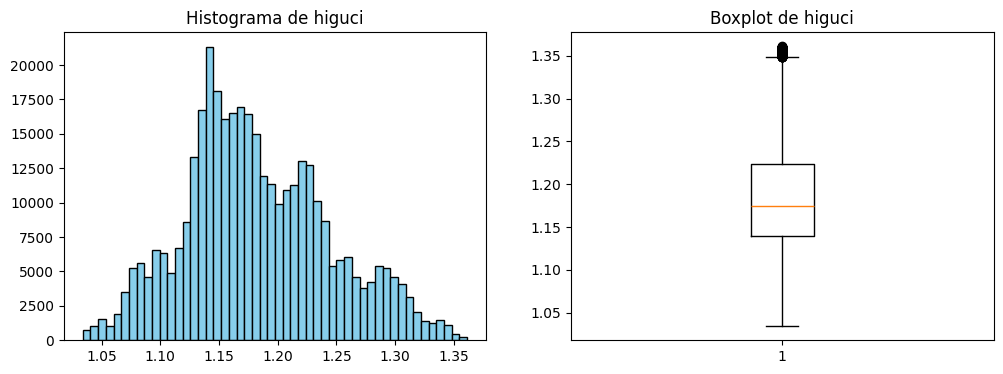

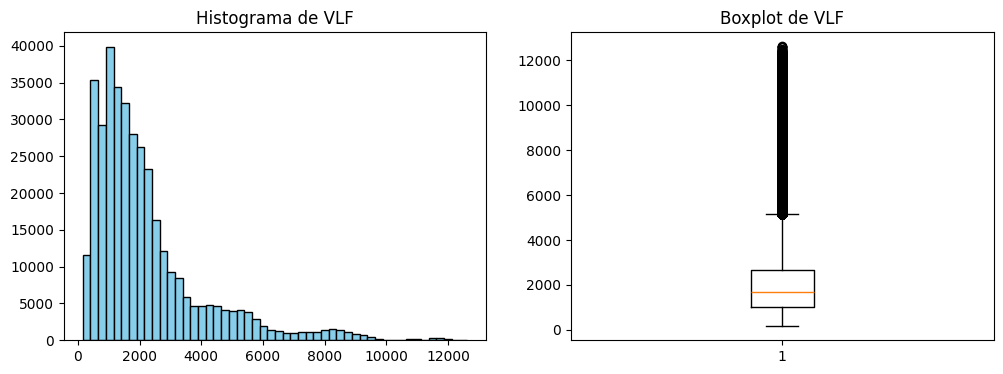

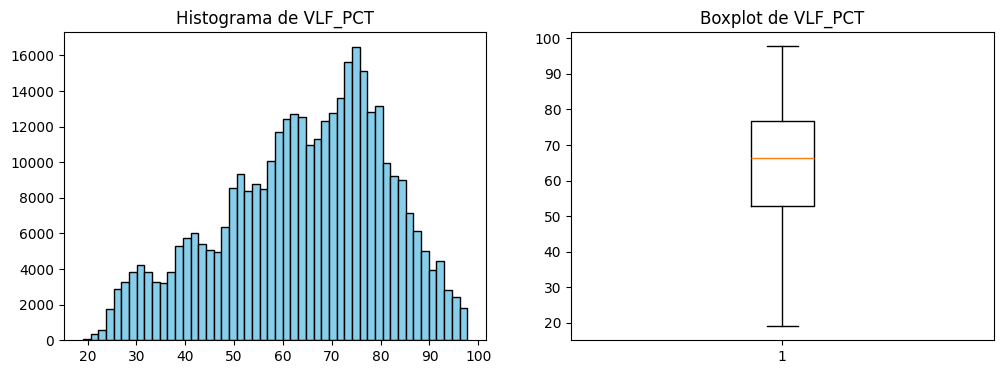

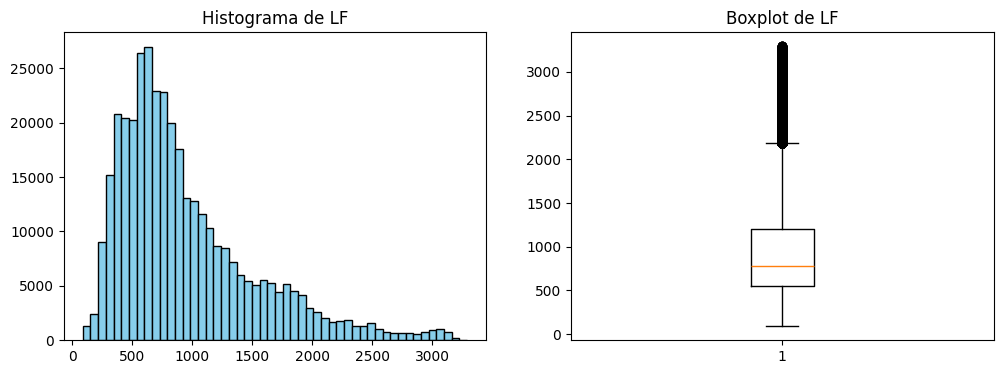

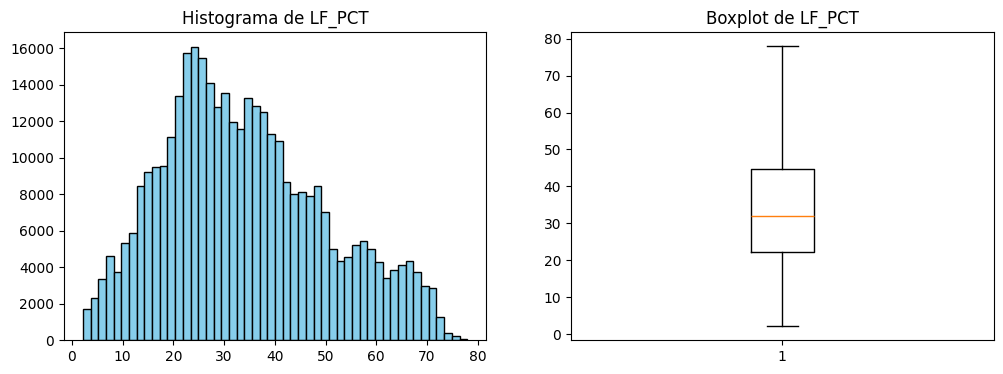

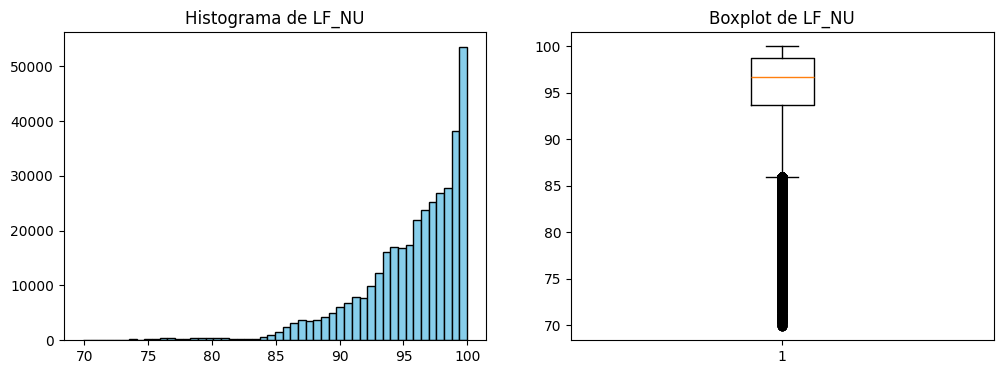

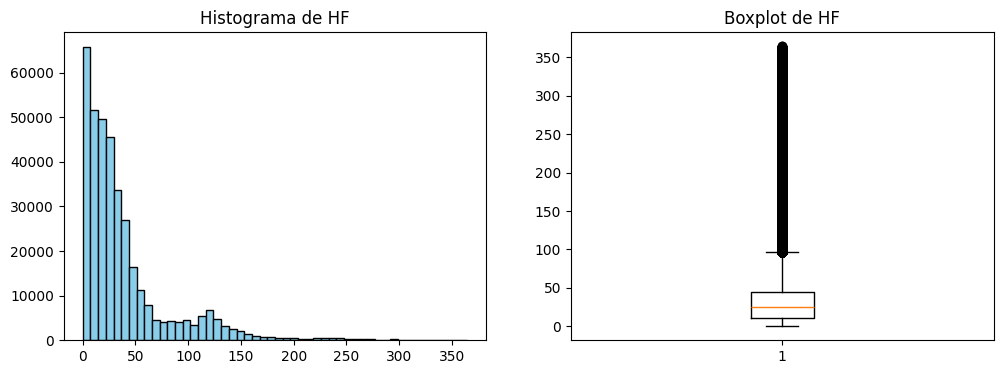

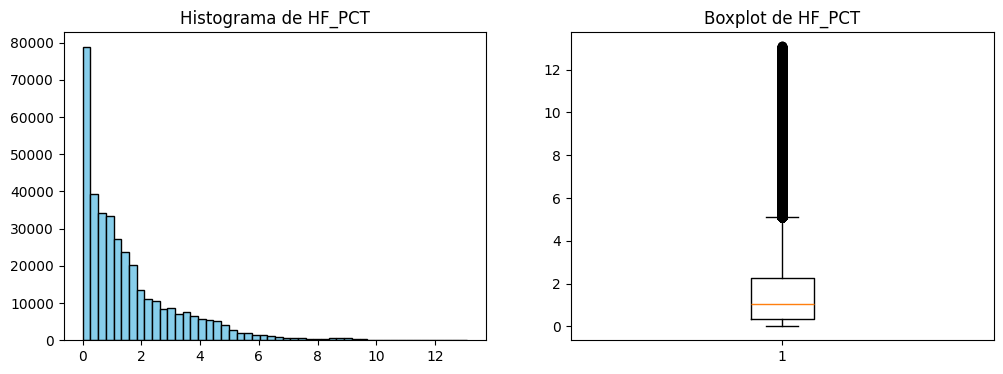

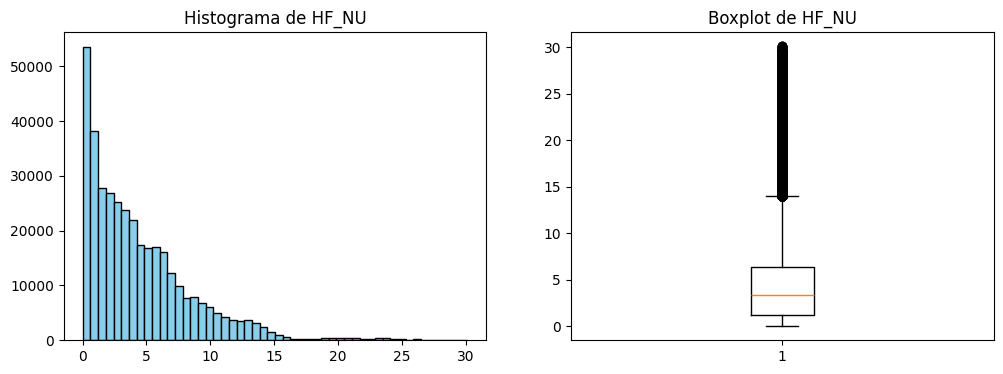

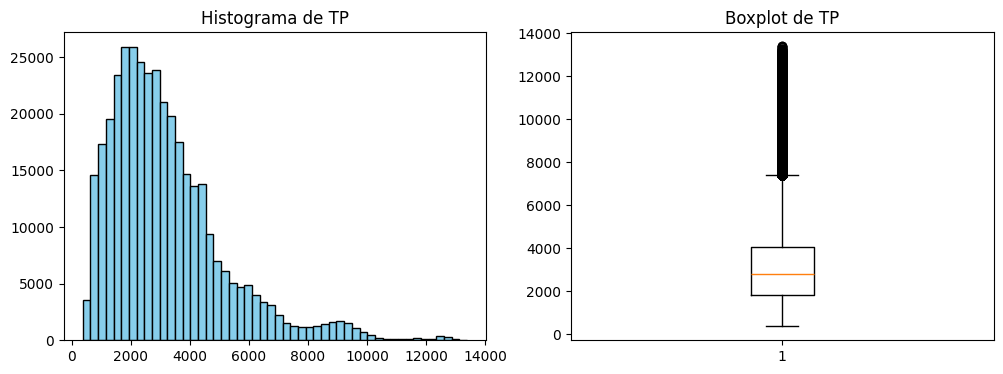

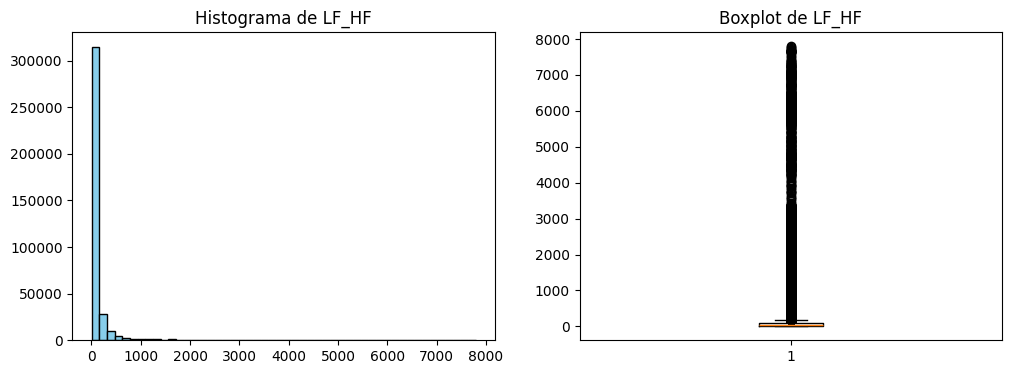

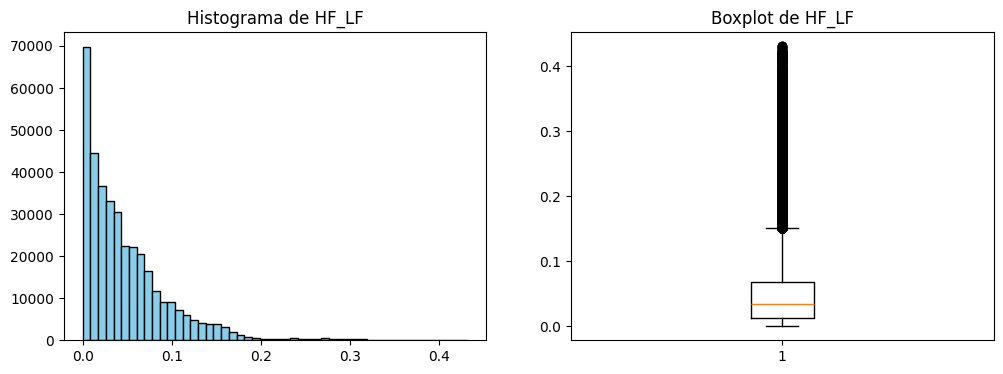

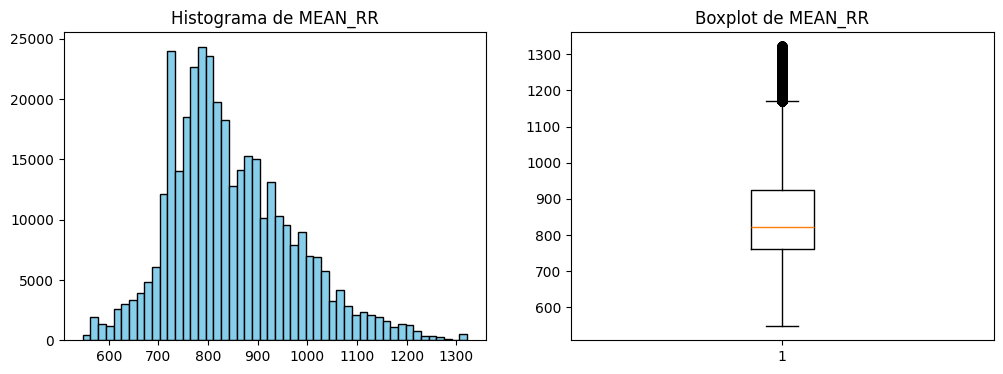

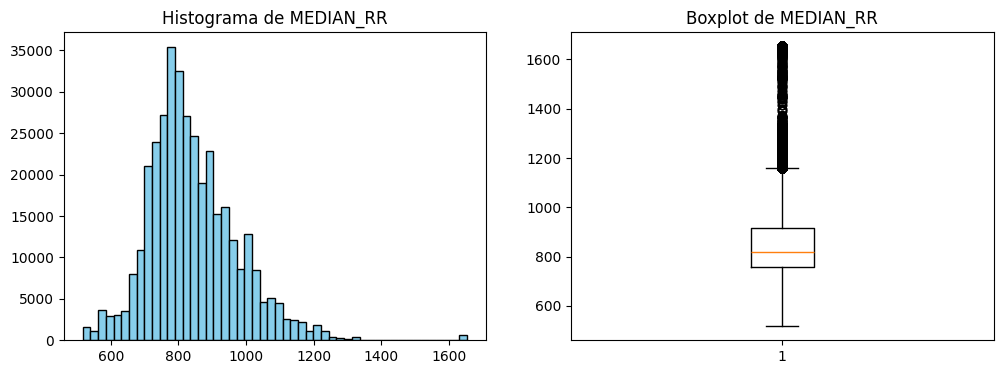

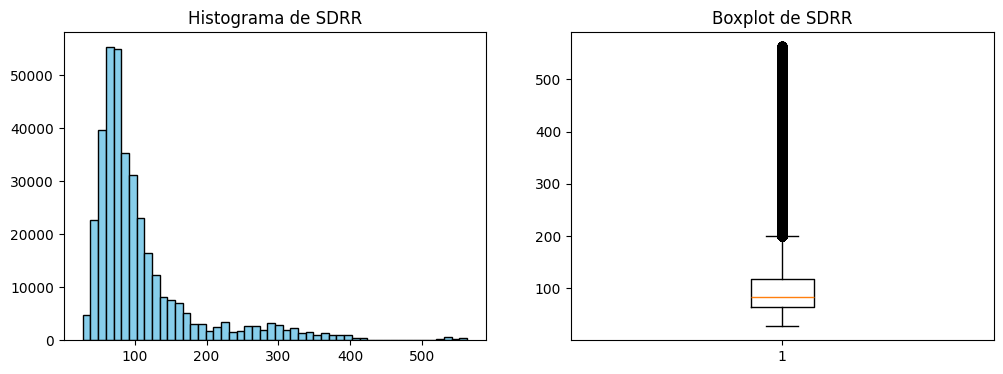

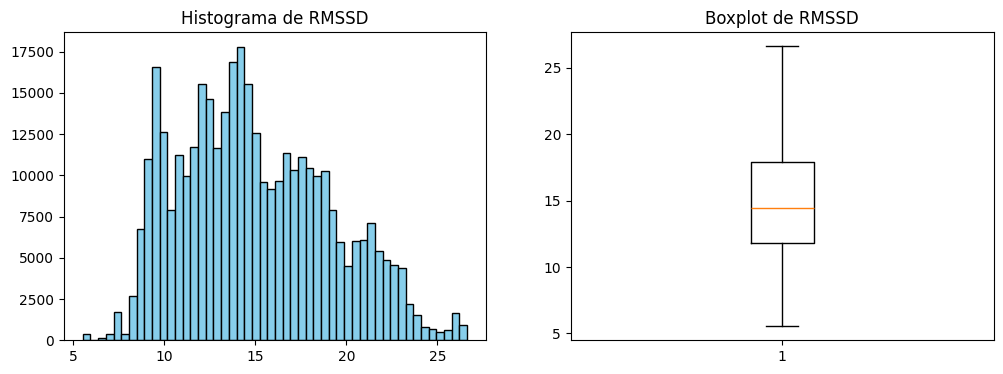

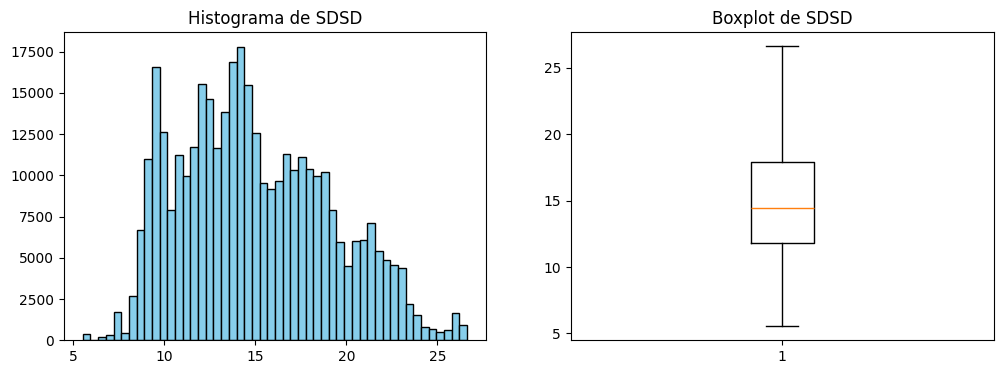

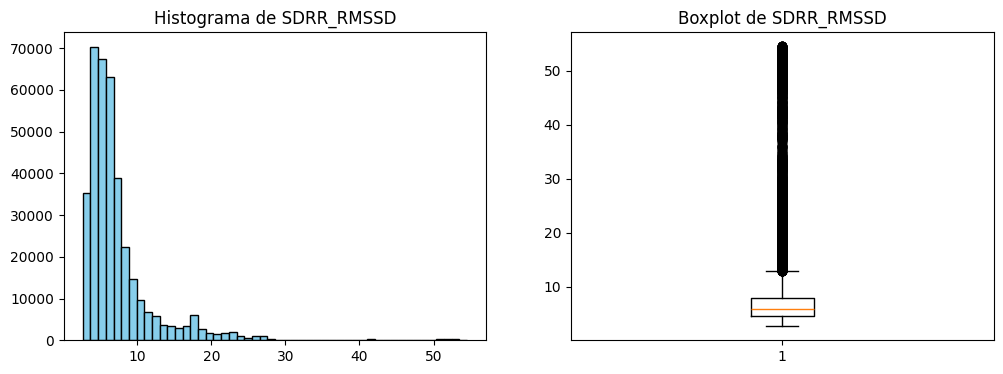

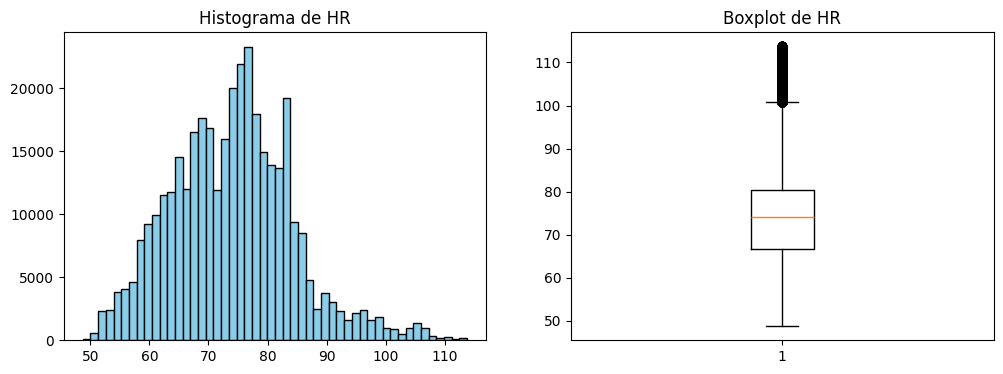

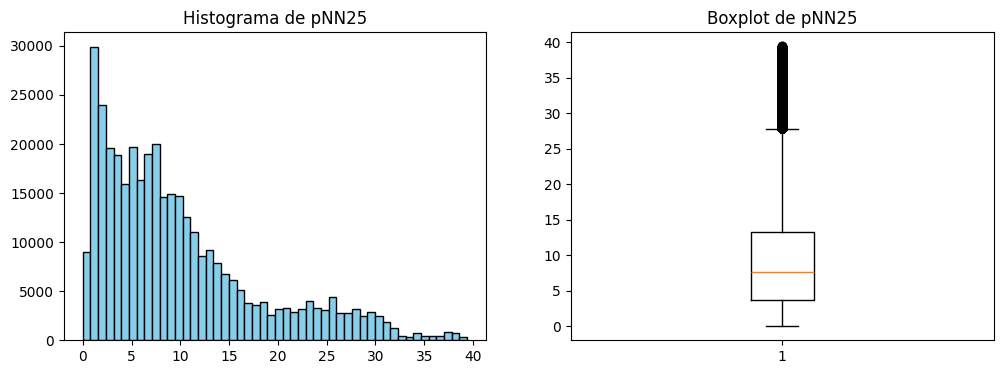

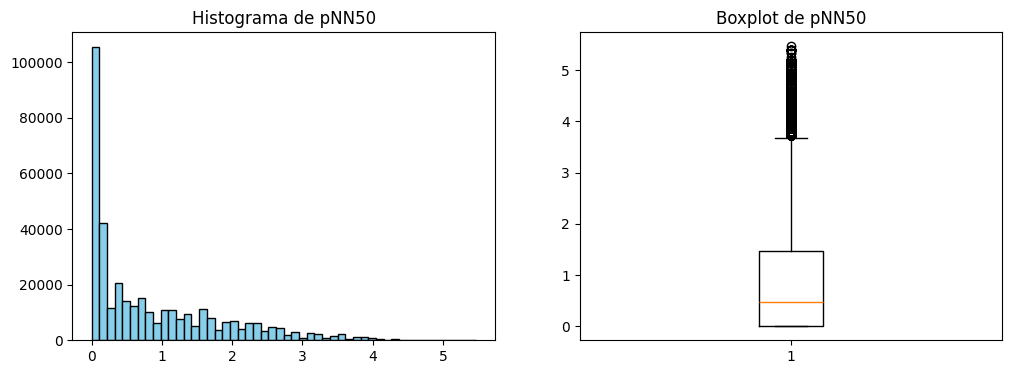

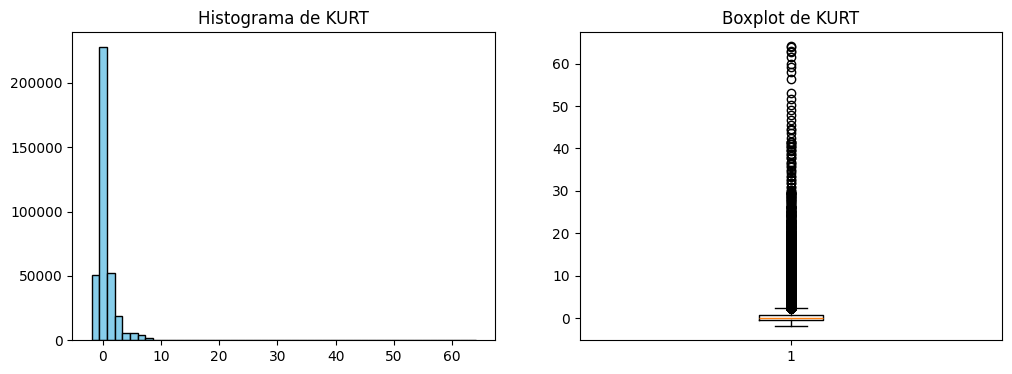

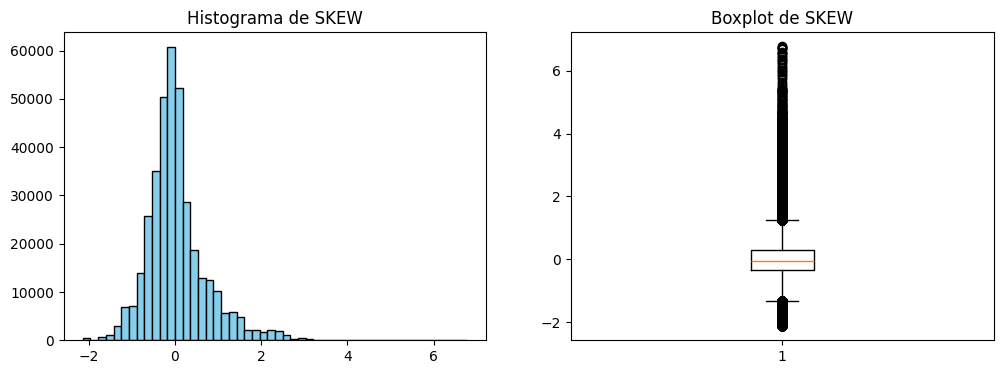

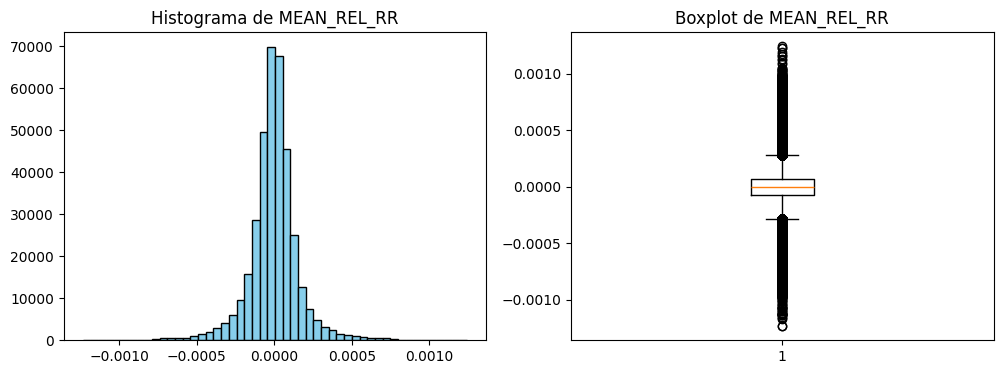

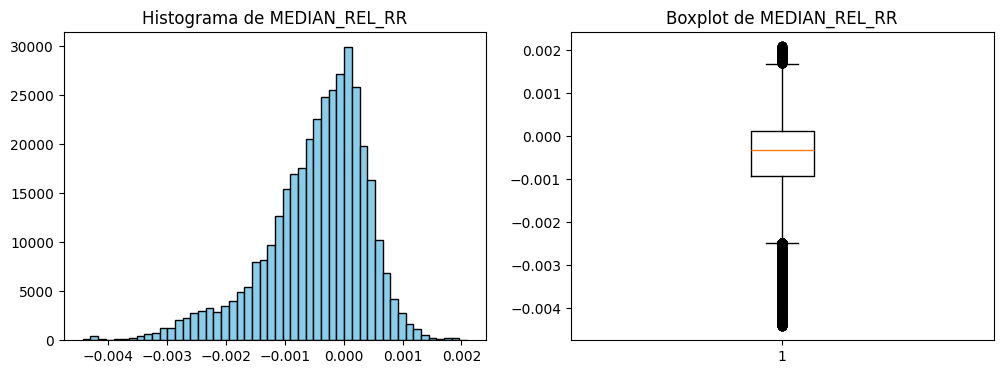

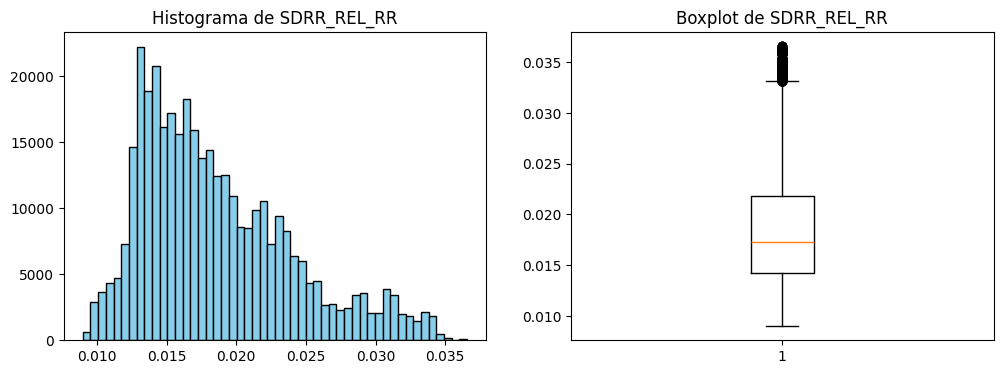

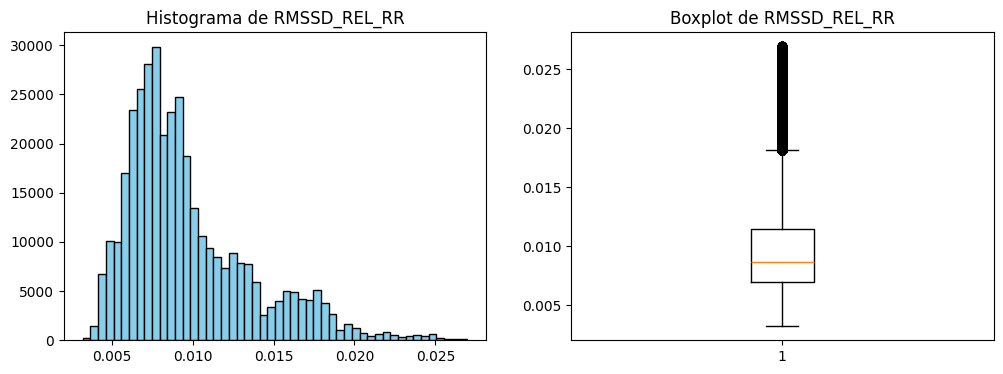

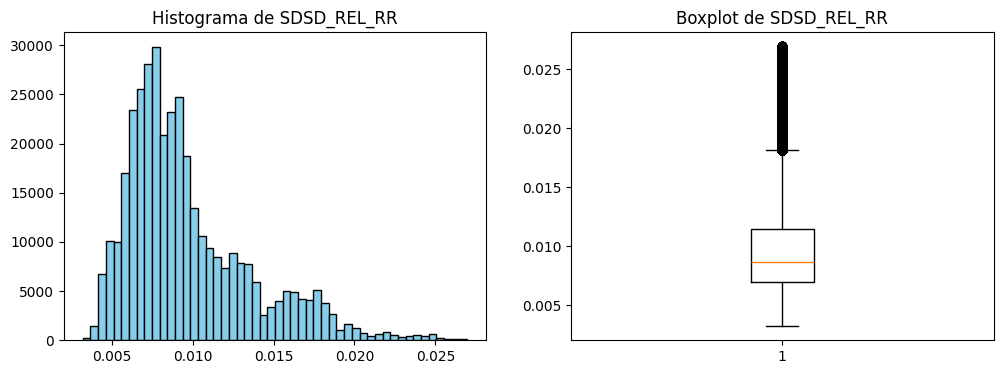

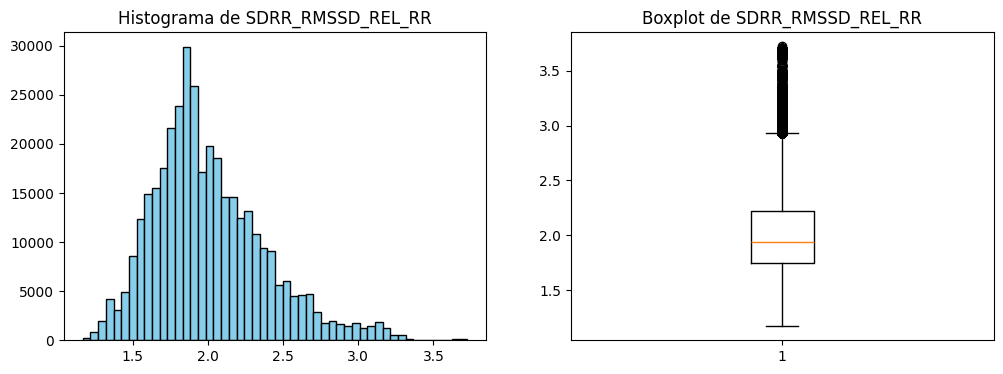

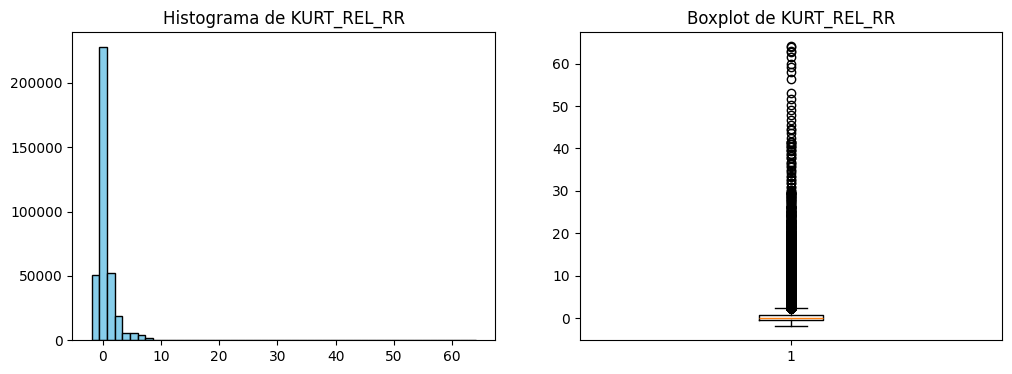

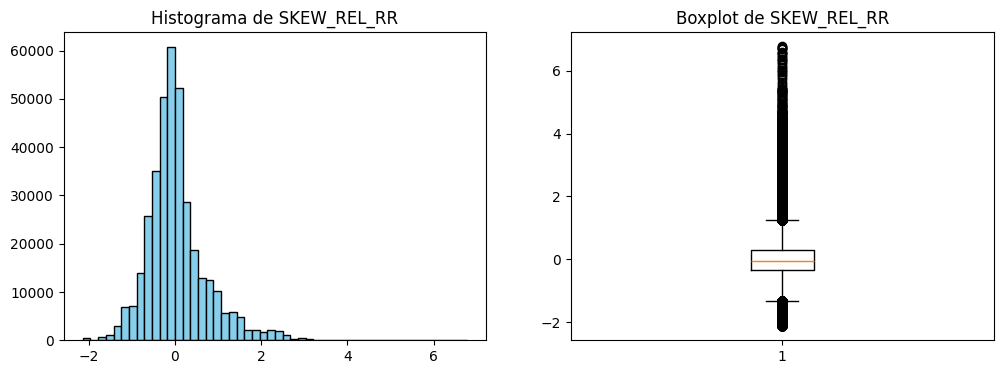

In [17]:
for col in colunas_numericas:
    plt.figure(figsize=(12,4))
    
    # Histograma
    plt.subplot(1,2,1)
    plt.hist(df[col], bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {col}')
    
    # Boxplot
    plt.subplot(1,2,2)
    plt.boxplot(df[col])
    plt.title(f'Boxplot de {col}')
    
    plt.show()

Perform a class-conditional mono-variate analysis of each of the predictors. Again,
you must plot their (class-conditional) histograms and box-plots, calculate their
(class-conditional) mean $µ_{d|l}$
, standard deviation $σ_{d|l}$ and skewness $γ_{d|l}$
, with $d =
1, . . . , D$, now using only the $N_l$ observations of class $l$, for each the $L$ classes.


In [18]:
tabelas = {}
for cond, grupo in df.groupby('condition'):
    tabelas[cond] = grupo[colunas_numericas].agg(['mean','std','skew']).T

In [19]:
tabelas["no stress"]

mean          std      skew
SD1                1.002632e+01     2.706387  0.473932
SD2                1.465703e+02   110.609448  2.836190
sampen             2.029312e+00     0.250486 -2.702469
higuci             1.185612e+00     0.059157  0.425701
VLF                1.927212e+03  1436.072619  1.846618
VLF_PCT            6.385264e+01    16.336092 -0.424531
LF                 8.715590e+02   504.568186  1.220664
LF_PCT             3.427110e+01    15.559790  0.456076
LF_NU              9.485734e+01     4.302544 -1.454775
HF                 4.352038e+01    47.685591  2.480371
HF_PCT             1.876265e+00     1.876858  1.901642
HF_NU              5.142659e+00     4.302544  1.454775
TP                 2.842291e+03  1583.568506  1.375289
LF_HF              6.163258e+01   118.015368  4.766995
HF_LF              5.655757e-02     0.051836  1.904550
MEAN_RR            8.129298e+02   109.994953  0.841535
MEDIAN_RR          8.072643e+02   121.965645  1.661866
SDRR               1.039568e+02    78.138081  2.837352
RMSSD              1.417542e+01     3.826056  0.473854
SDSD               1.417463e+01     3.826132  0.473932
SDRR_RMSSD         7.491690e+00     5.798792  4.109650
HR                 7.674904e+01     9.725866  0.265812
pNN25              8.172970e+00     7.058905  1.388203
pNN50              7.423533e-01     0.886740  1.282604
KURT               7.814898e-01     2.181591  5.264982
SKEW               1.086792e-01     0.795562  1.143264
MEAN_REL_RR        5.299303e-07     0.000166  0.074265
MEDIAN_REL_RR     -4.699608e-04     0.000941 -1.140346
SDRR_REL_RR        1.831076e-02     0.005482  0.832015
RMSSD_REL_RR       9.833757e-03     0.004042  1.243248
SDSD_REL_RR        9.833741e-03     0.004042  1.243249
SDRR_RMSSD_REL_RR  1.952621e+00     0.353066  0.699093
KURT_REL_RR        7.814898e-01     2.181591  5.264982
SKEW_REL_RR        1.086792e-01     0.795562  1.143264

In [20]:
tabelas["interruption"]

mean          std      skew
SD1                1.157477e+01     3.330185  0.183675
SD2                1.500161e+02   102.282134  2.155068
sampen             2.113072e+00     0.125695 -2.216320
higuci             1.190632e+00     0.064337  0.340316
VLF                2.206573e+03  2044.915678  2.351228
VLF_PCT            6.057276e+01    17.280177 -0.212185
LF                 1.154907e+03   722.635994  0.968746
LF_PCT             3.786831e+01    16.654894  0.182226
LF_NU              9.591815e+01     4.119905 -1.875960
HF                 4.060773e+01    46.511955  2.083434
HF_PCT             1.558933e+00     1.741785  1.985212
HF_NU              4.081853e+00     4.119905  1.875960
TP                 3.402088e+03  2150.287703  1.665696
LF_HF              1.385683e+02   298.075749  4.012043
HF_LF              4.467111e-02     0.049494  2.529542
MEAN_RR            8.615610e+02   120.312234  0.687755
MEDIAN_RR          8.572065e+02   122.472335  0.590625
SDRR               1.064779e+02    72.237341  2.153444
RMSSD              1.636431e+01     4.708047  0.183469
SDSD               1.636373e+01     4.708022  0.183675
SDRR_RMSSD         6.642876e+00     4.244720  2.376403
HR                 7.236381e+01     9.557339  0.322759
pNN25              1.321426e+01    10.303719  0.676873
pNN50              1.038080e+00     1.114112  1.109714
KURT               6.917242e-02     0.719733  1.437704
SKEW              -6.545293e-02     0.488235  0.630651
MEAN_REL_RR       -3.566381e-07     0.000153  0.254045
MEDIAN_REL_RR     -5.724174e-04     0.000782 -0.621721
SDRR_REL_RR        1.979551e-02     0.005888  0.757671
RMSSD_REL_RR       1.026965e-02     0.003956  1.176845
SDSD_REL_RR        1.026963e-02     0.003956  1.176845
SDRR_RMSSD_REL_RR  2.003142e+00     0.349167  0.929732
KURT_REL_RR        6.917242e-02     0.719733  1.437704
SKEW_REL_RR       -6.545293e-02     0.488235  0.630651

In [21]:
tabelas["time pressure"]

mean          std      skew
SD1                  10.755520     2.299041 -0.132216
SD2                 184.778013   110.343928  1.411293
sampen                2.082985     0.130583 -1.690559
higuci                1.158234     0.062014  0.218580
VLF                3038.842291  2183.006484  0.978472
VLF_PCT              71.753604    14.817083 -0.704850
LF                  838.651129   384.317062  1.072087
LF_PCT               27.352099    14.240940  0.739303
LF_NU                97.205583     2.805935 -1.639757
HF                   23.657391    30.417040  3.302415
HF_PCT                0.894297     1.076518  1.797540
HF_NU                 2.794417     2.805935  1.639757
TP                 3901.150811  2223.512284  0.689030
LF_HF               248.639179   730.544500  5.729301
HF_LF                 0.029650     0.031315  1.895932
MEAN_RR             927.499113   132.302495 -0.058945
MEDIAN_RR           925.338514   136.966403 -0.106196
SDRR                130.924775    77.964958  1.411452
RMSSD                15.206321     3.250600 -0.132265
SDSD                 15.205528     3.250250 -0.132216
SDRR_RMSSD            8.336810     4.010670  1.541410
HR                   67.763790    10.188172  1.621055
pNN25                 9.514684     5.462191  0.452069
pNN50                 0.969747     1.025575  1.197133
KURT                  0.461924     1.487374  2.380049
SKEW                  0.007967     0.647145  0.982604
MEAN_REL_RR          -0.000011     0.000170  0.070286
MEDIAN_REL_RR        -0.000274     0.000718 -0.145099
SDRR_REL_RR           0.017371     0.004080  0.798885
RMSSD_REL_RR          0.008356     0.002904  1.043544
SDSD_REL_RR           0.008356     0.002904  1.043544
SDRR_RMSSD_REL_RR     2.182134     0.430047  0.741238
KURT_REL_RR           0.461924     1.487374  2.380049
SKEW_REL_RR           0.007967     0.647145  0.982604


=== Condicao: no stress ===


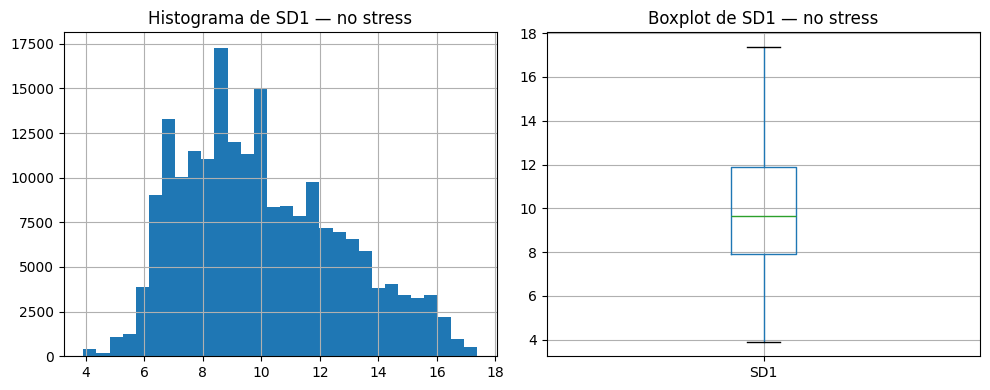

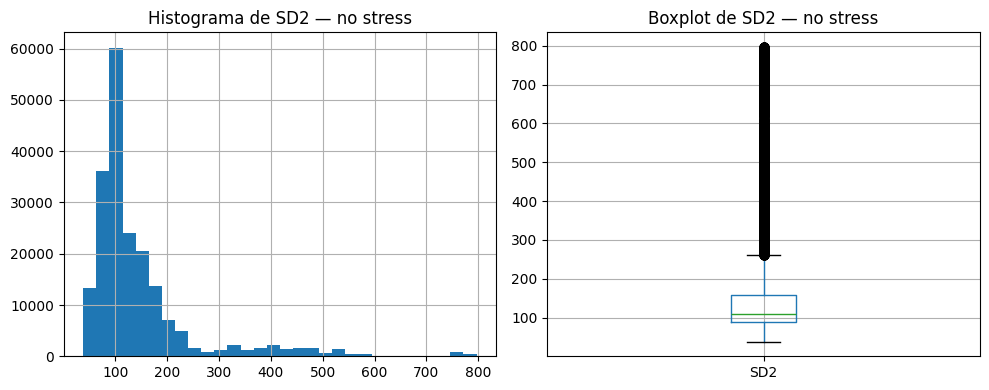

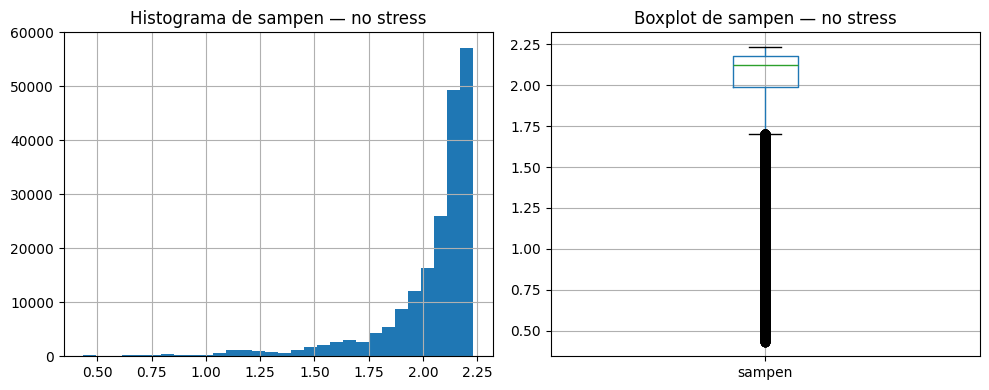

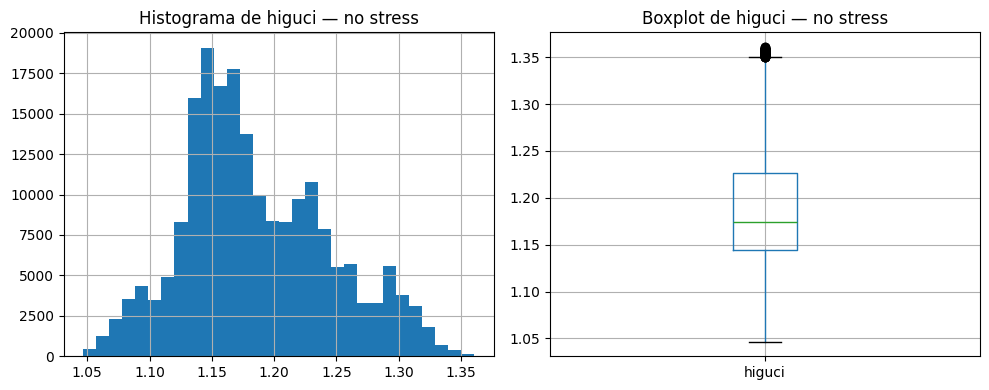

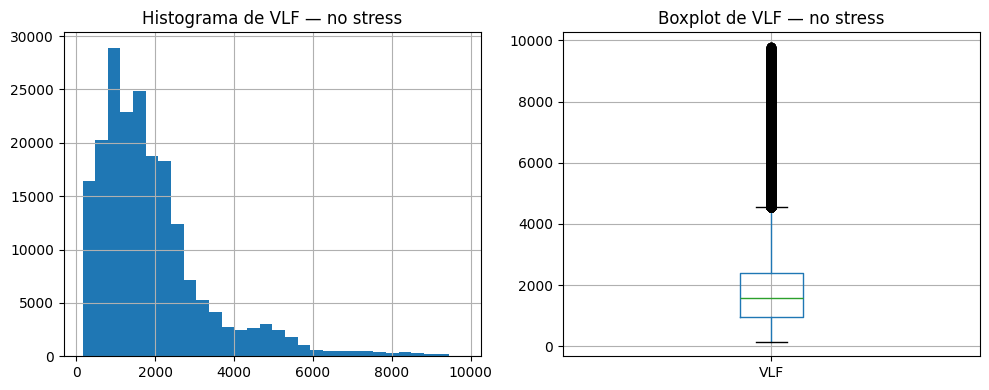

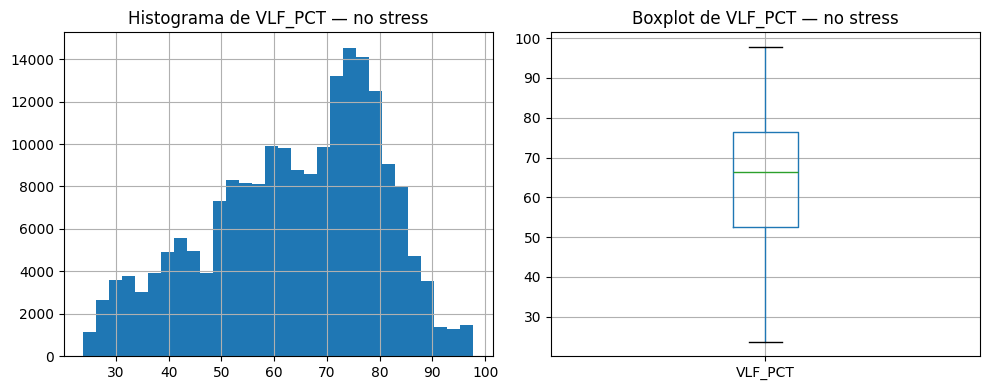

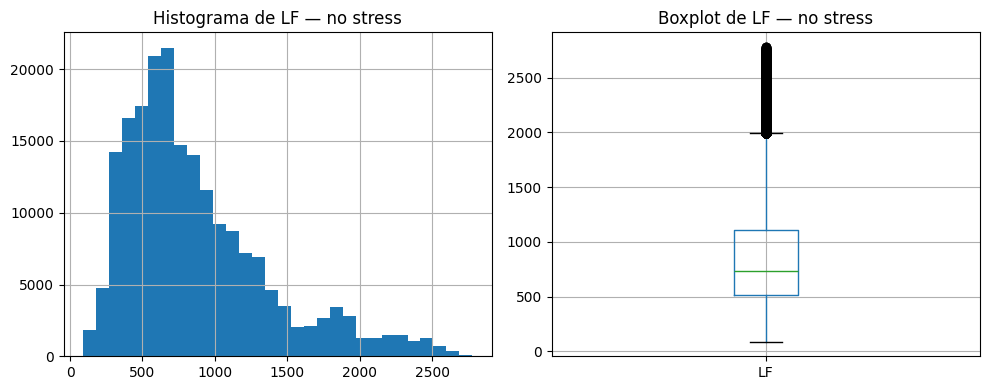

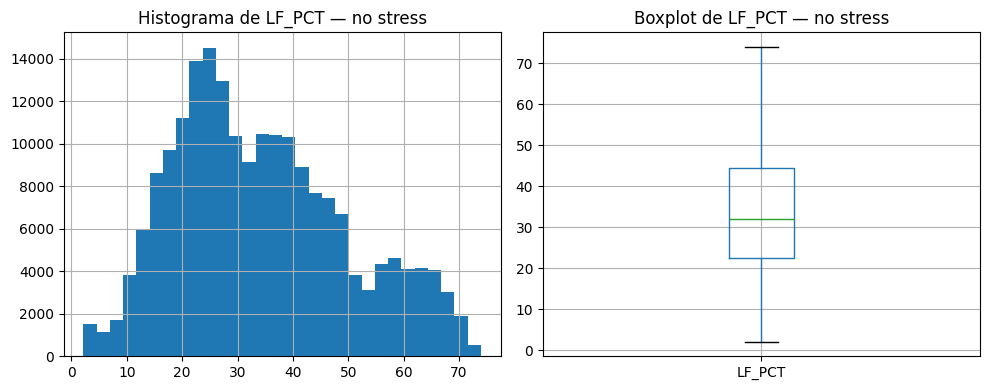

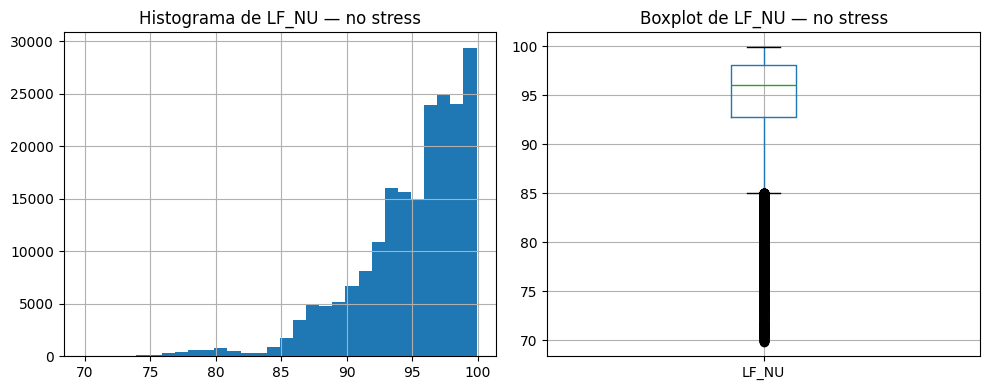

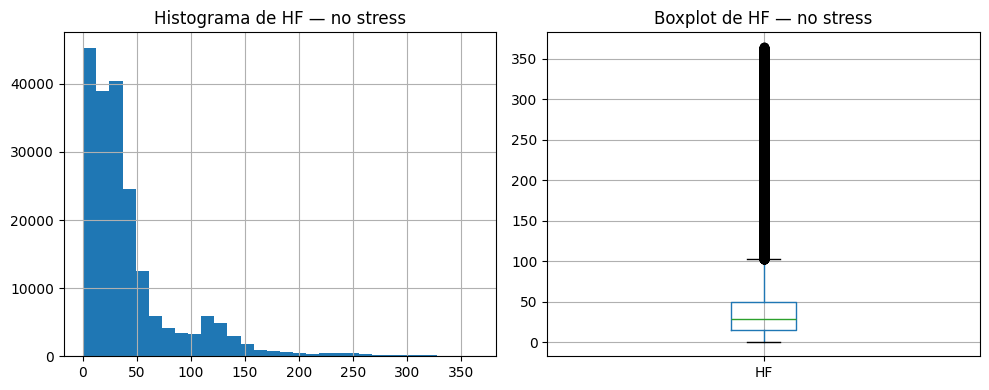

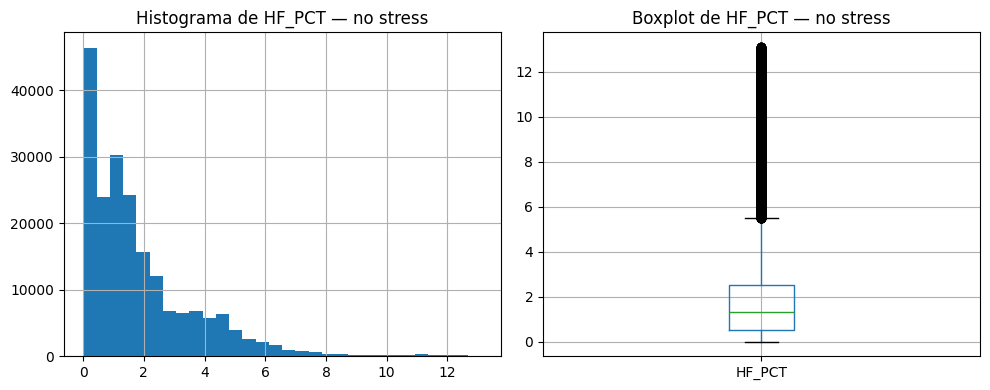

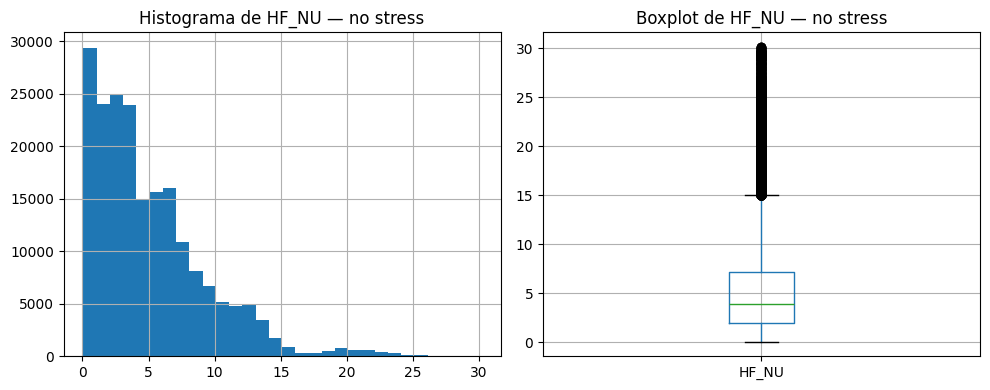

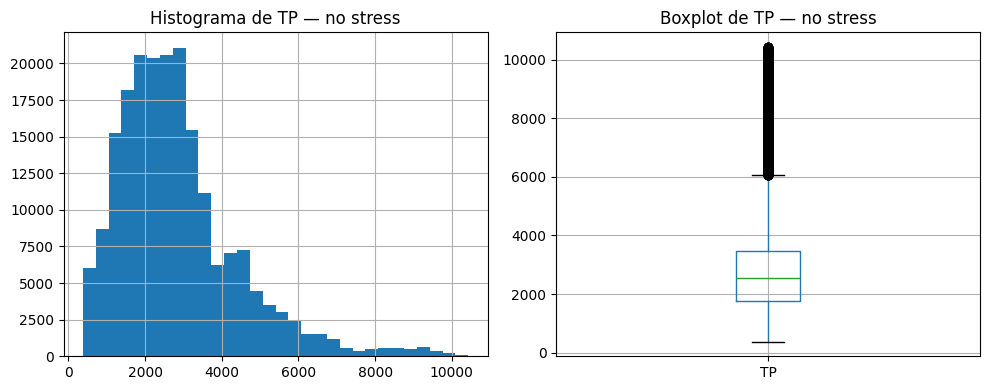

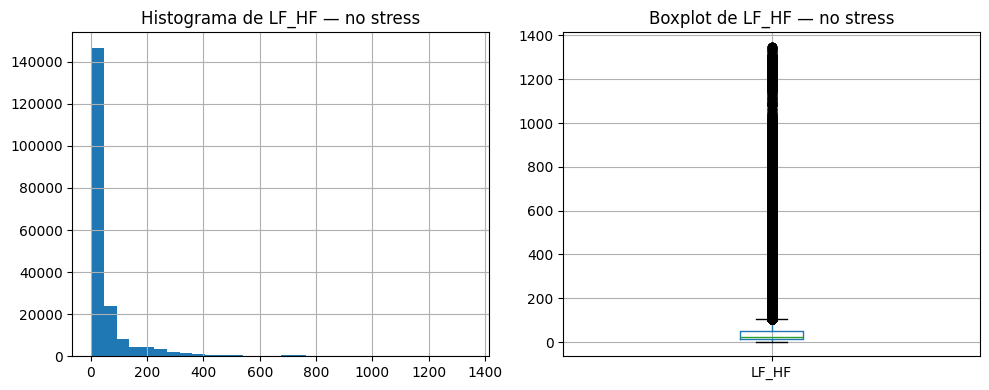

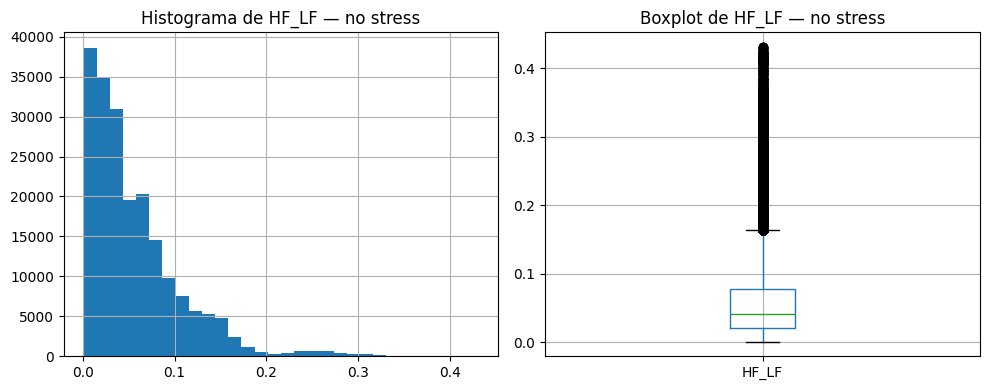

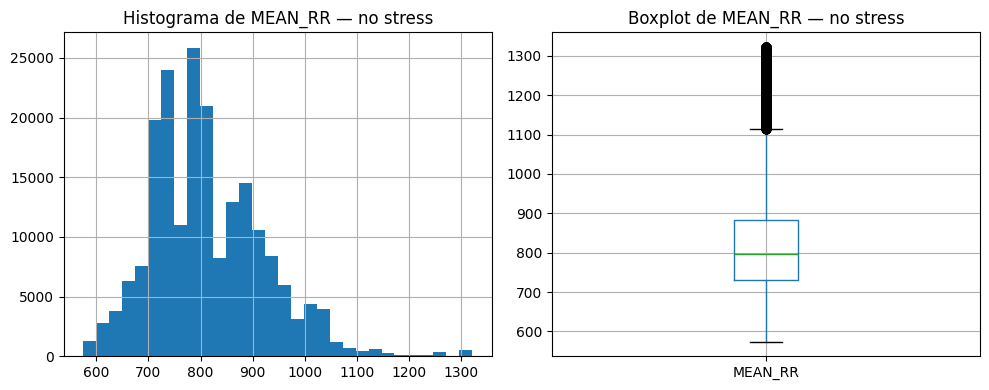

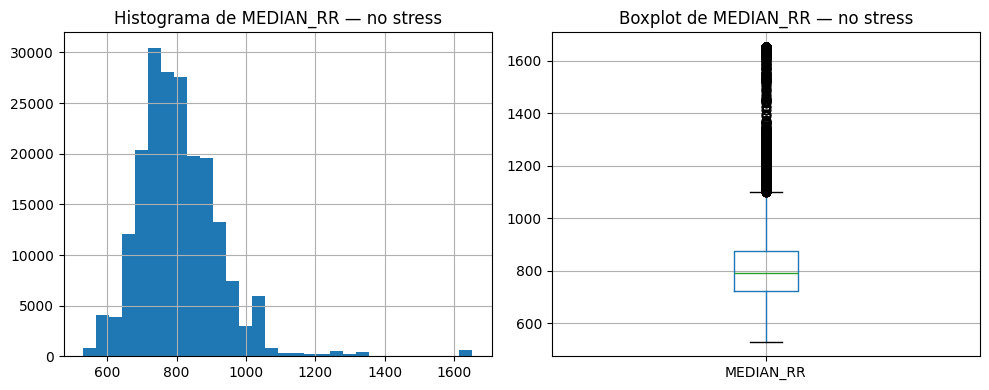

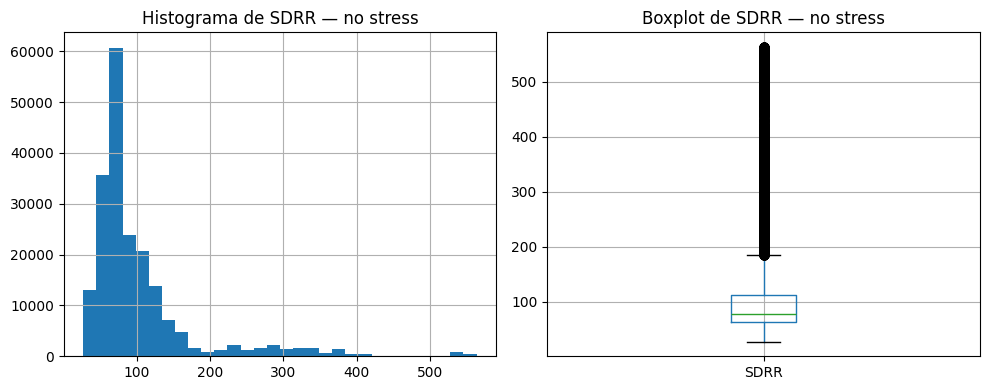

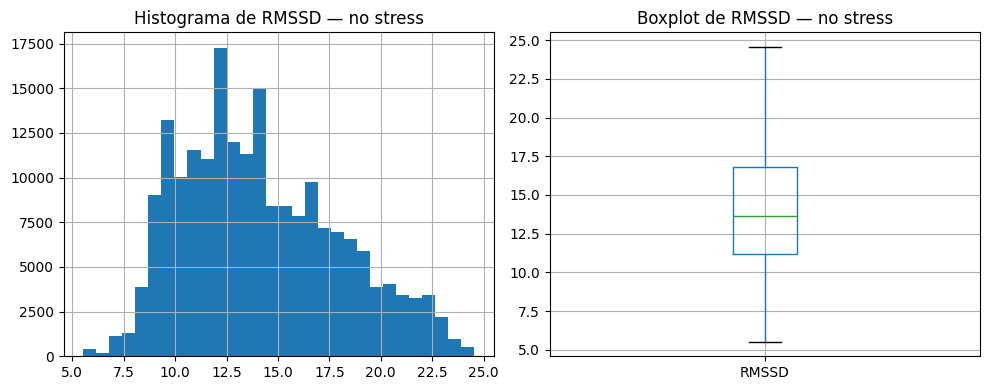

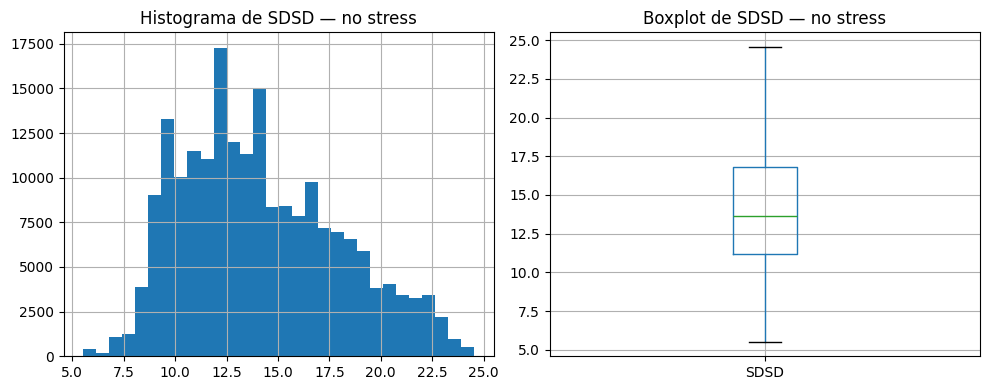

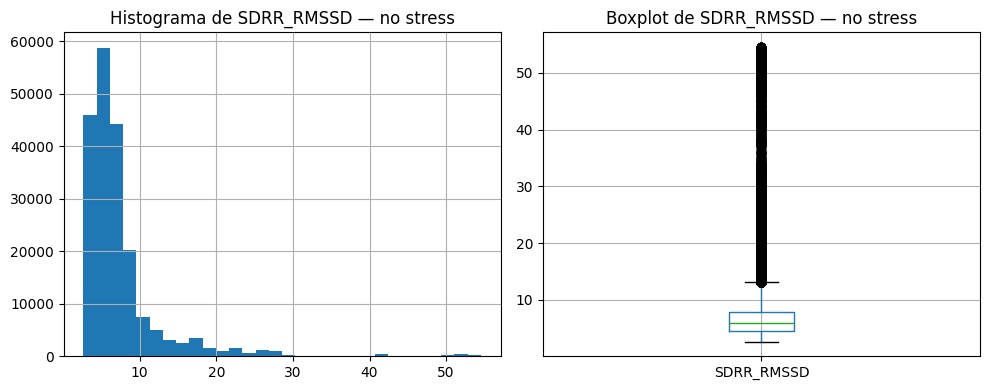

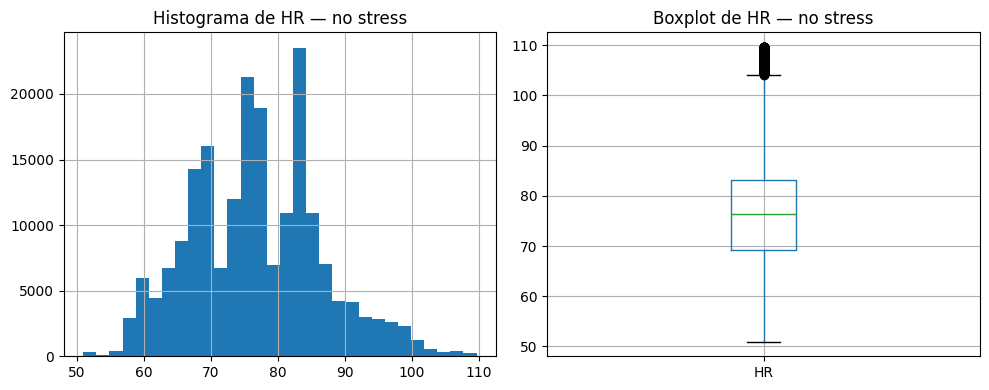

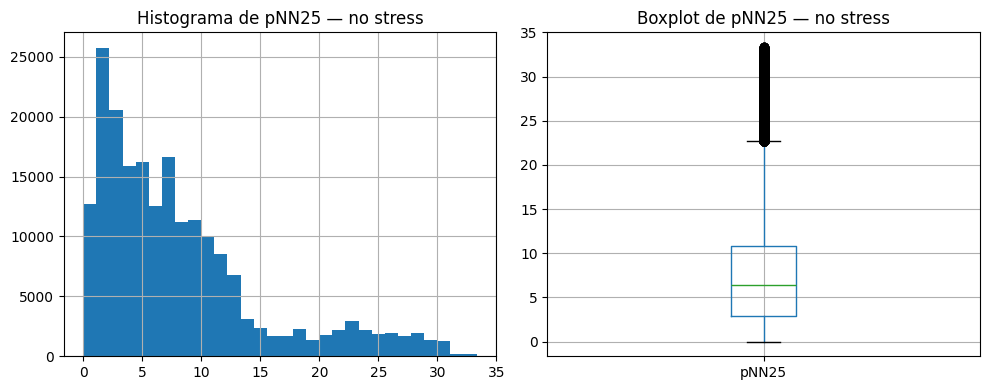

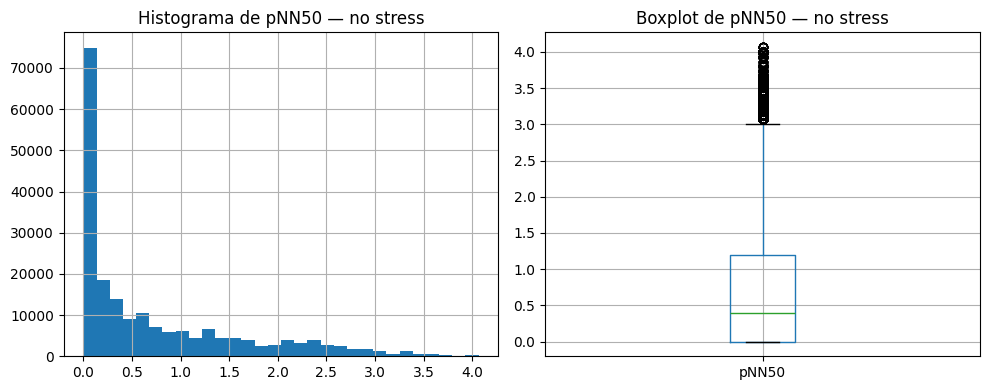

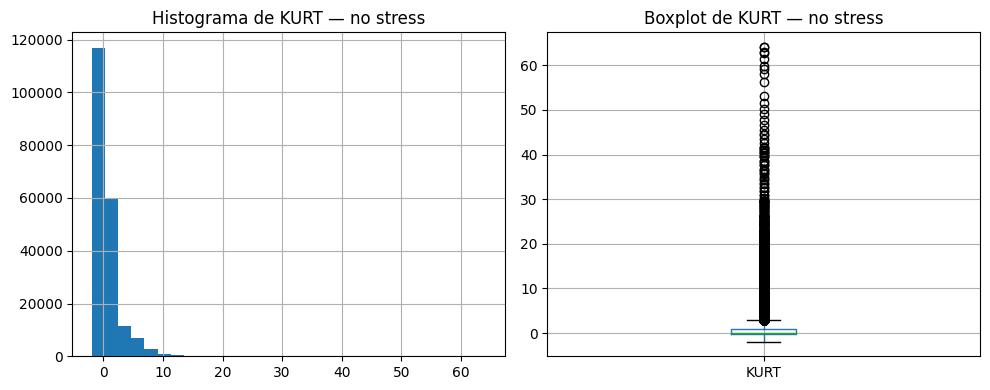

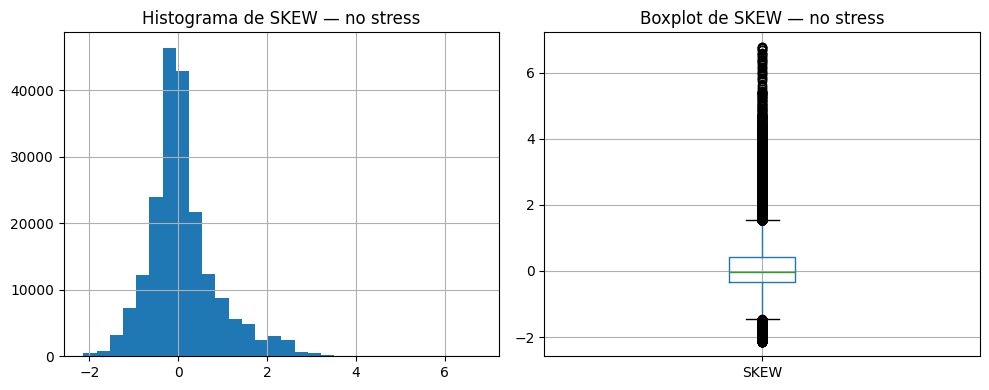

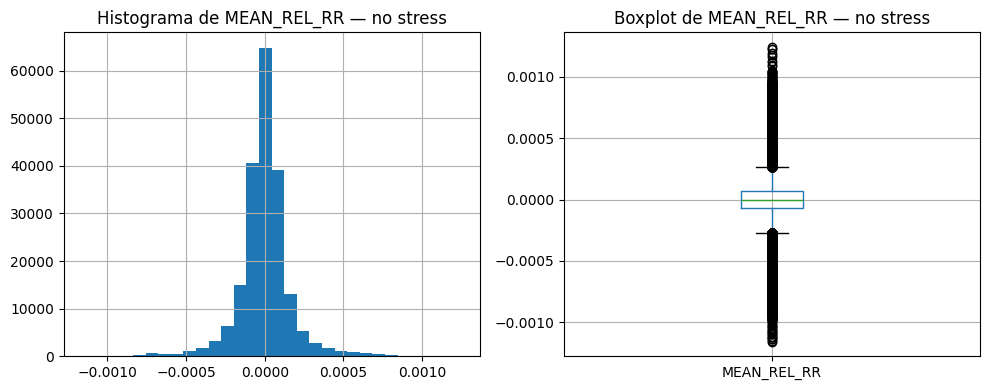

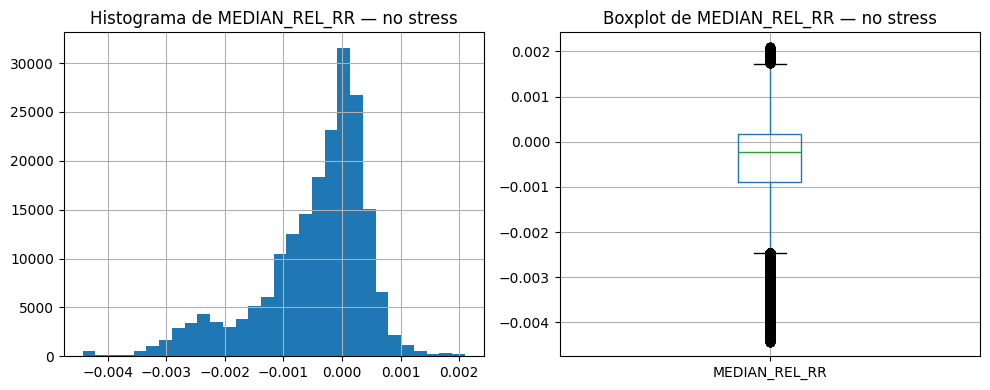

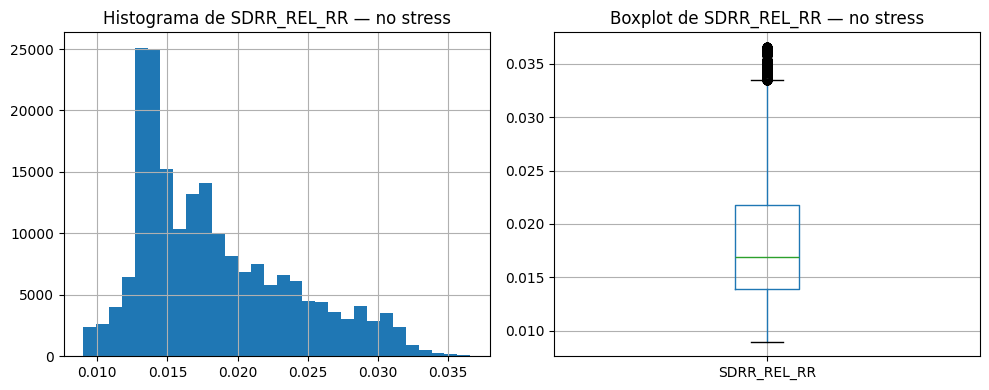

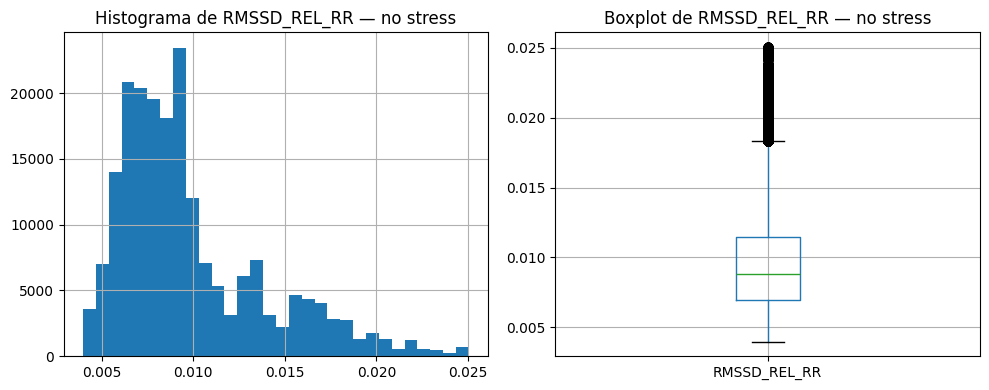

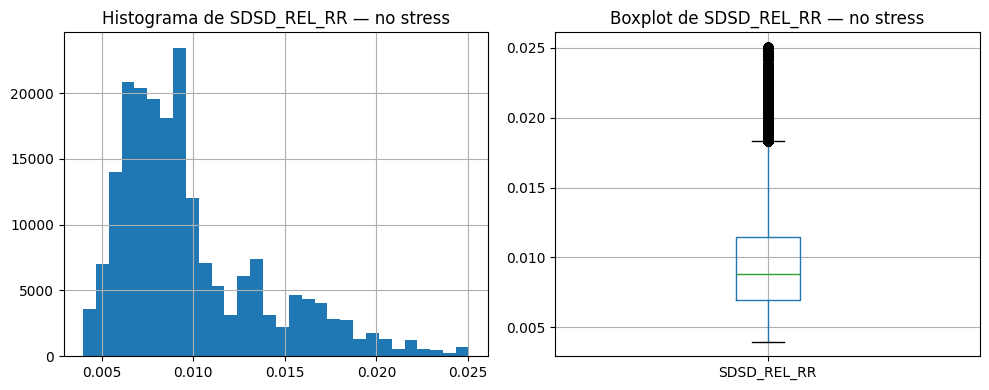

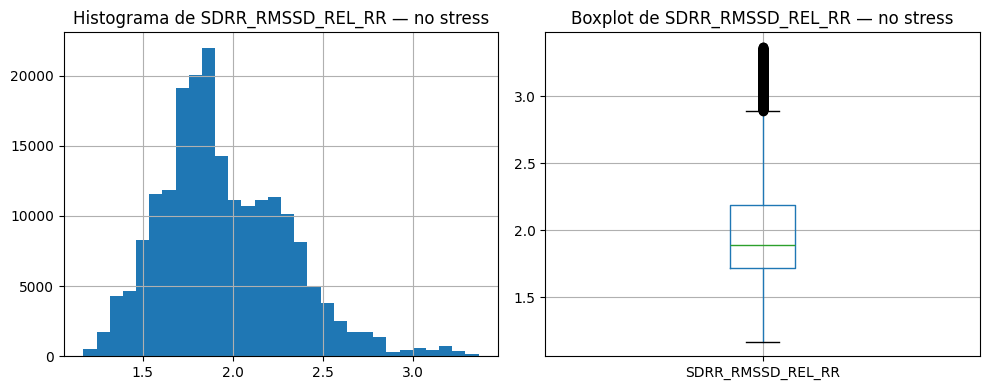

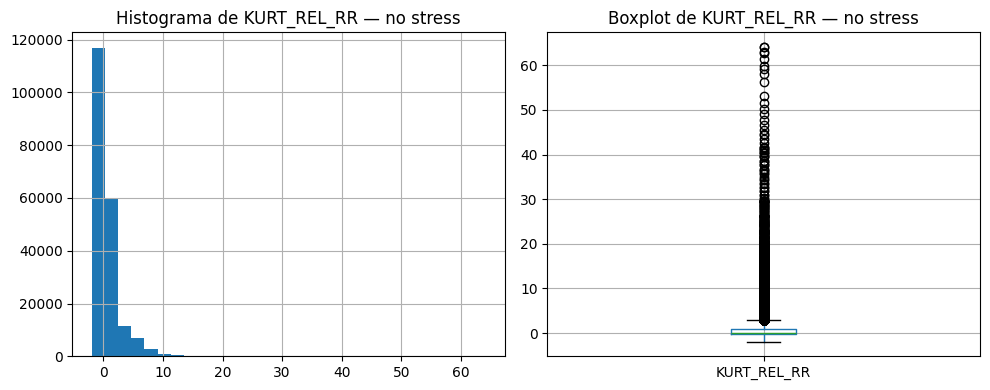

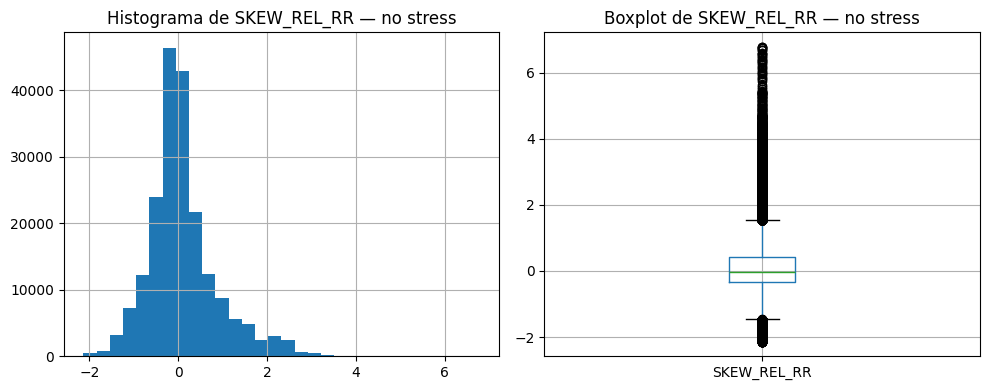


=== Condicao: interruption ===


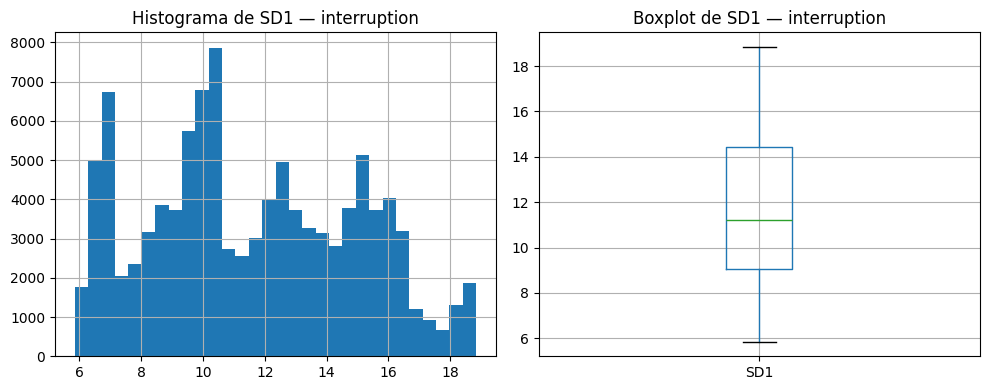

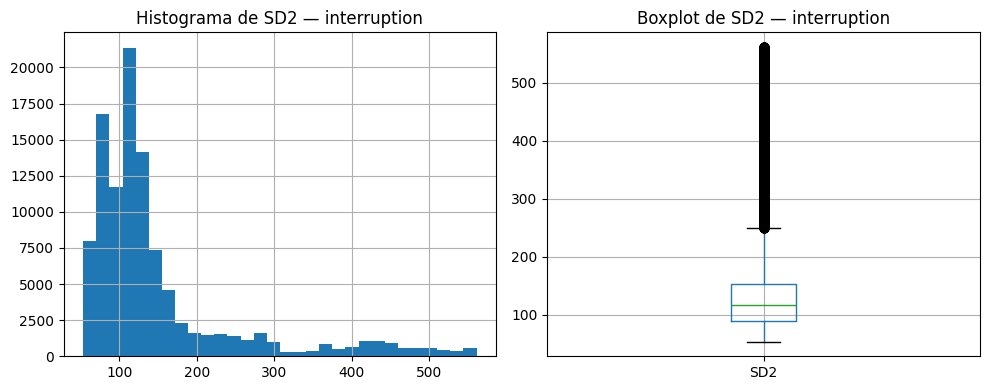

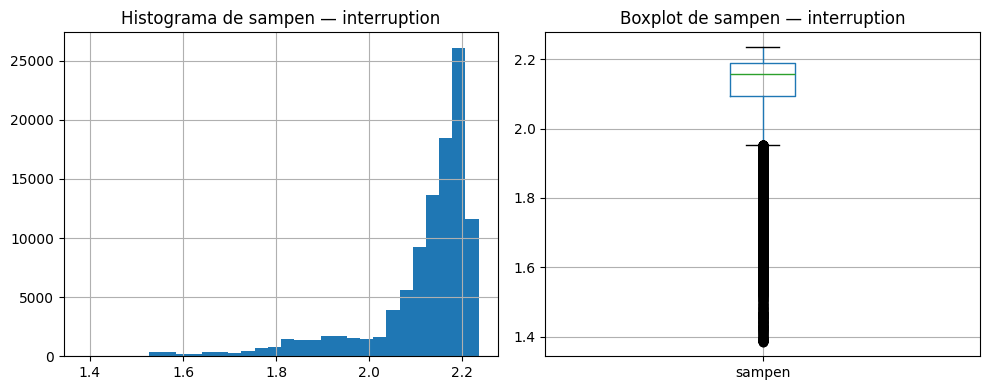

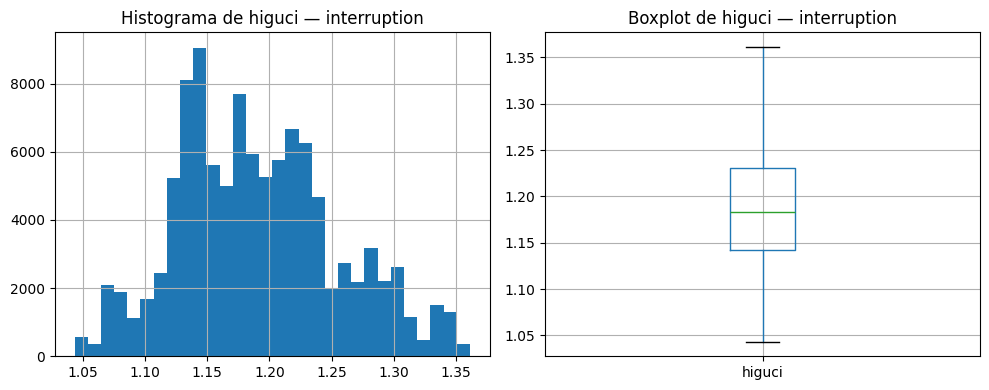

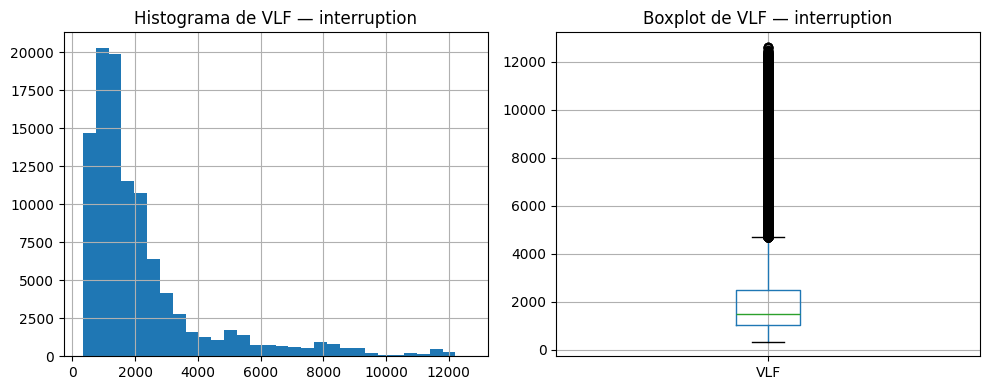

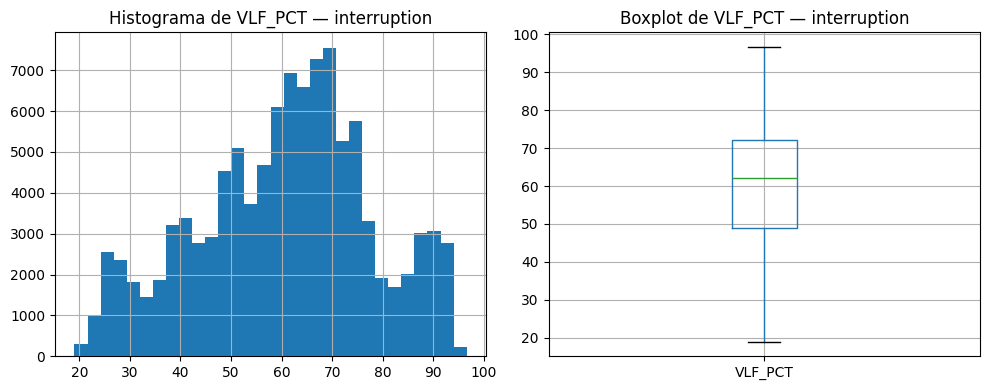

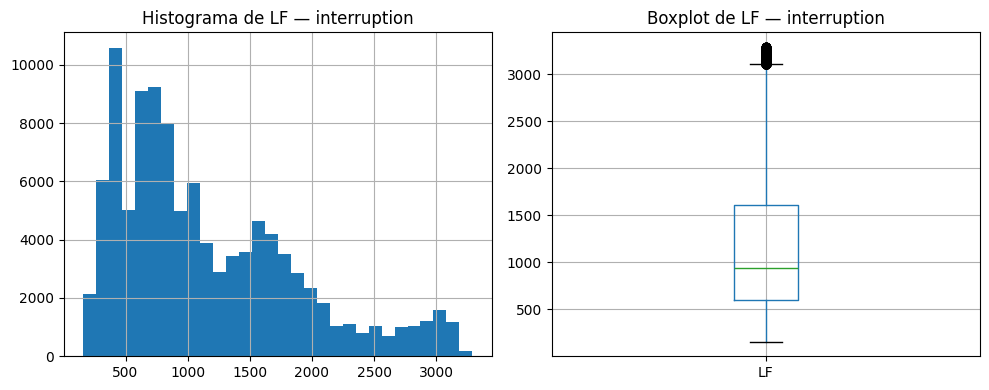

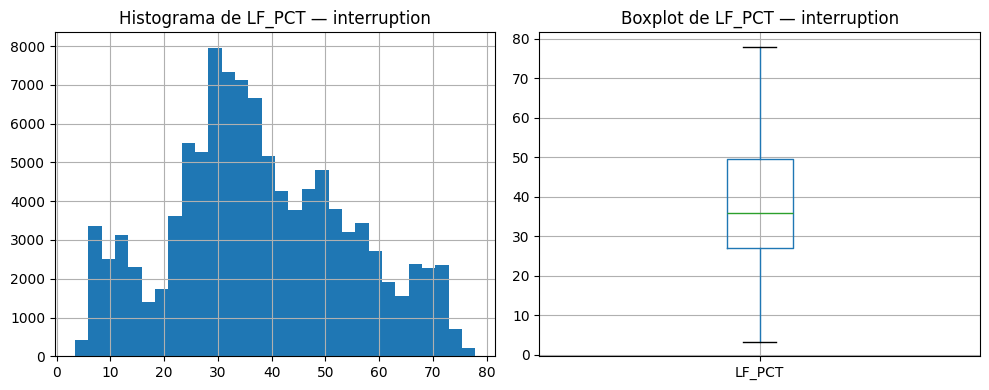

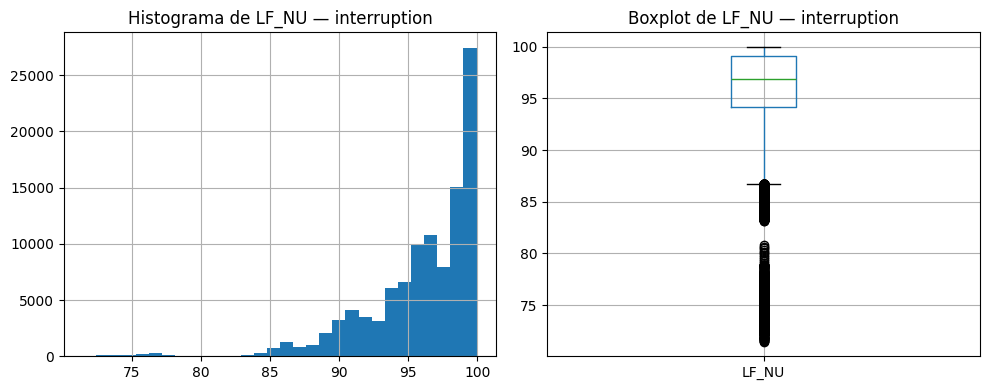

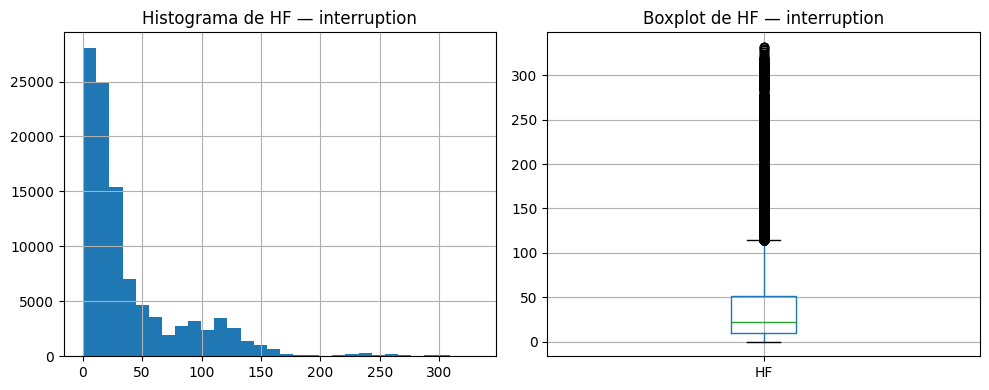

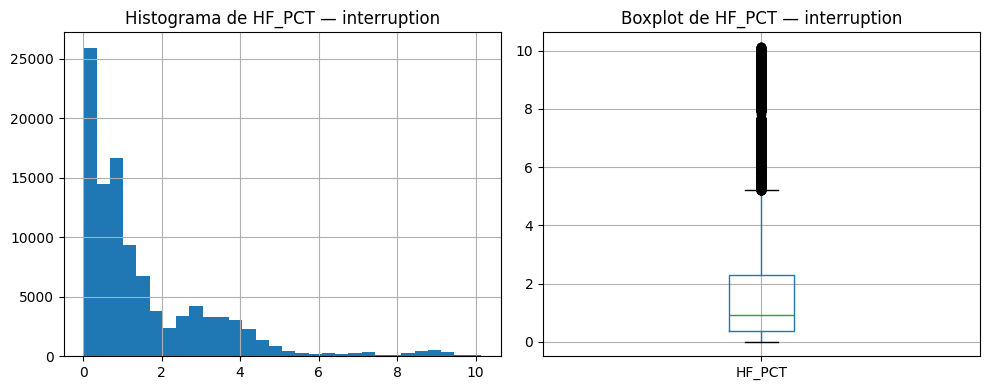

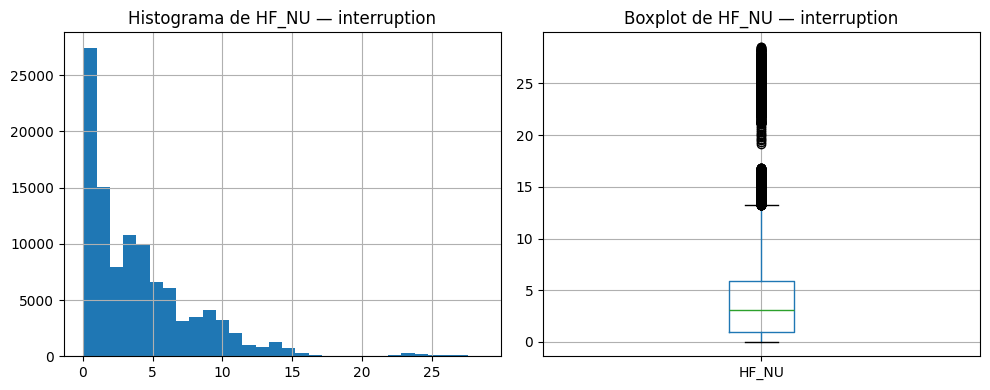

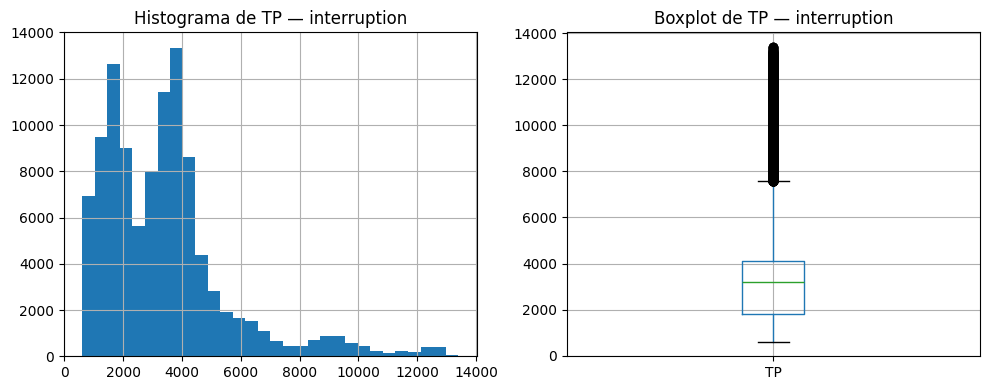

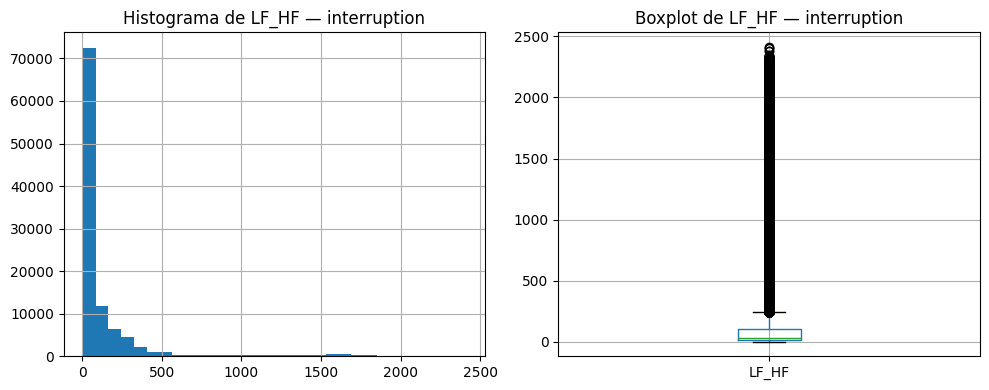

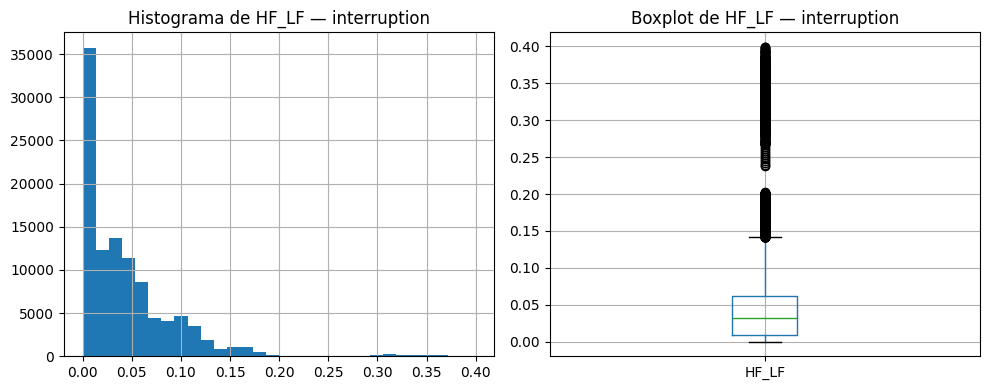

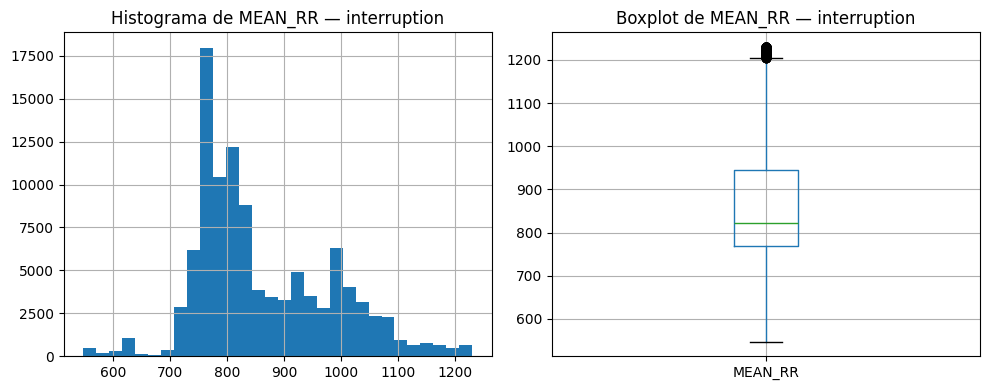

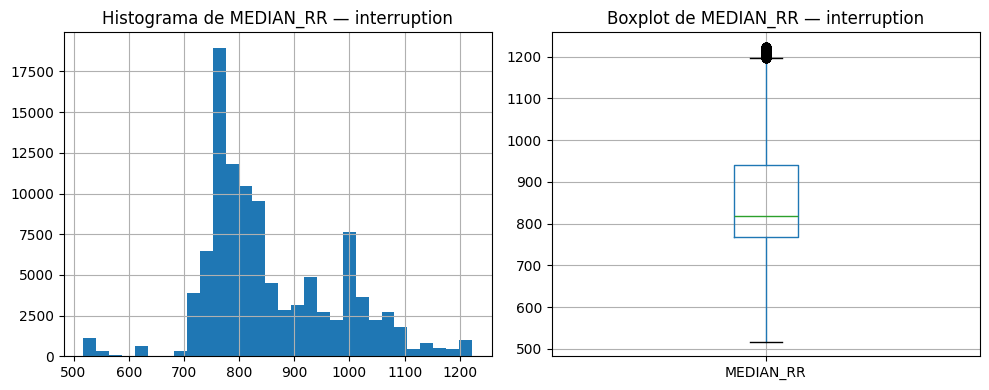

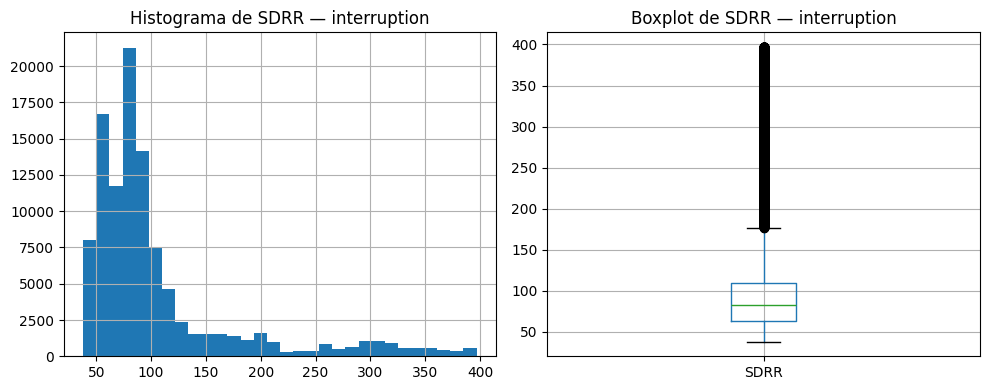

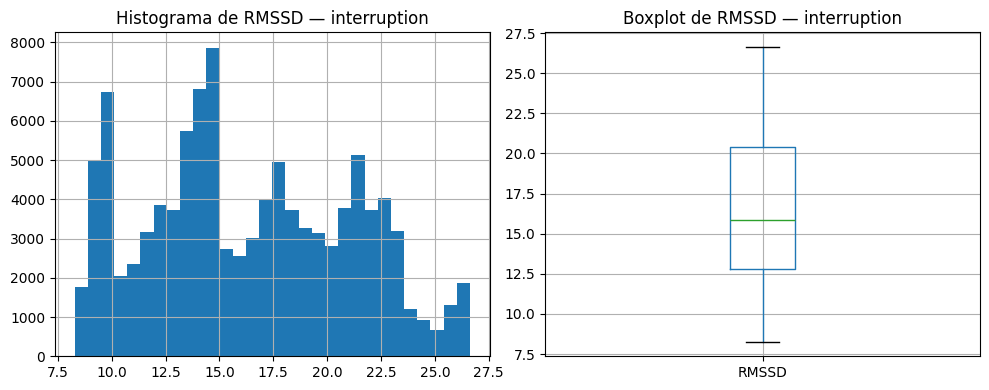

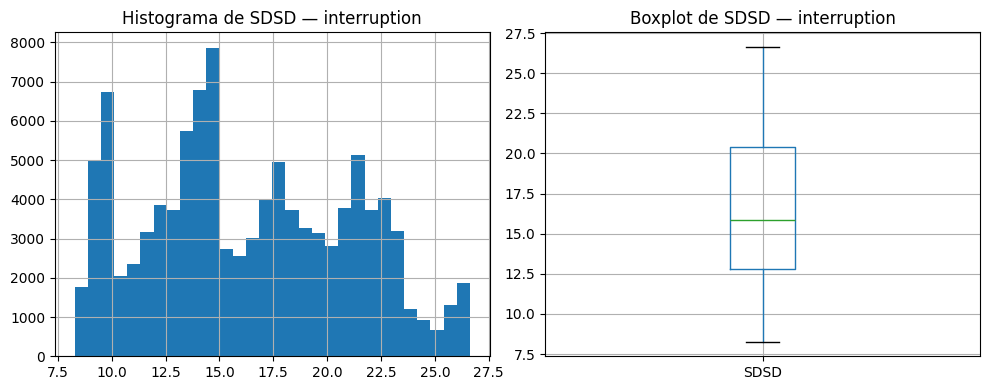

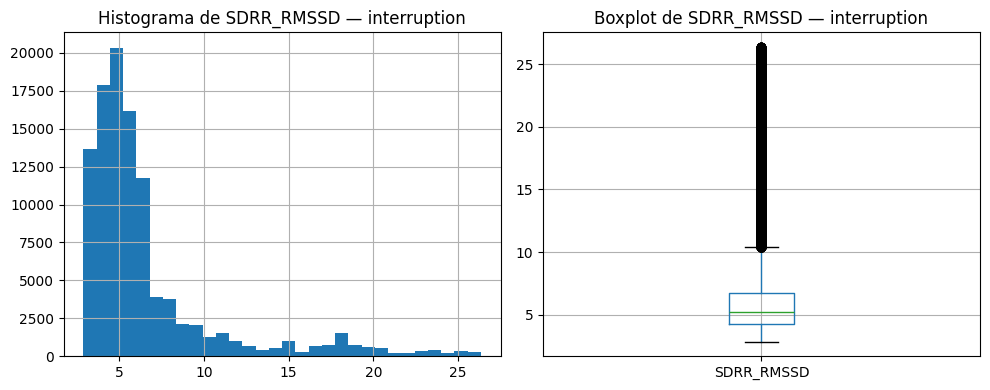

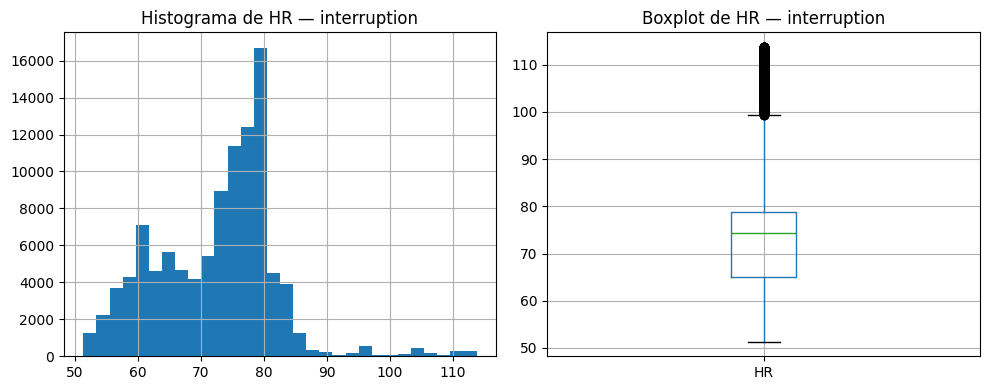

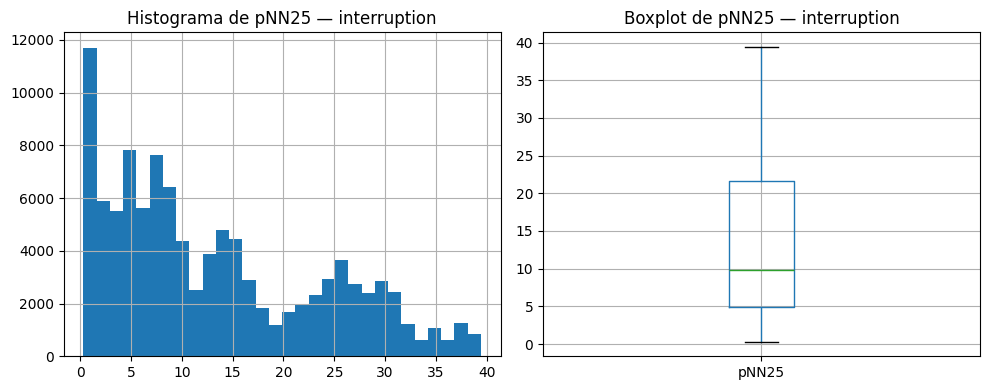

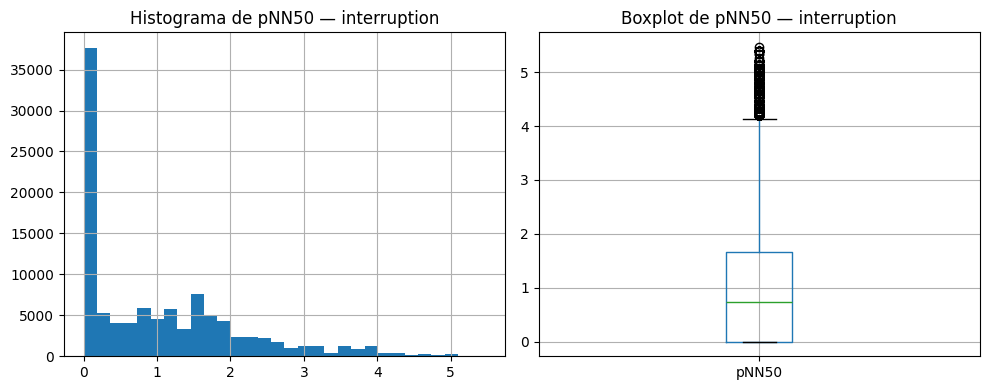

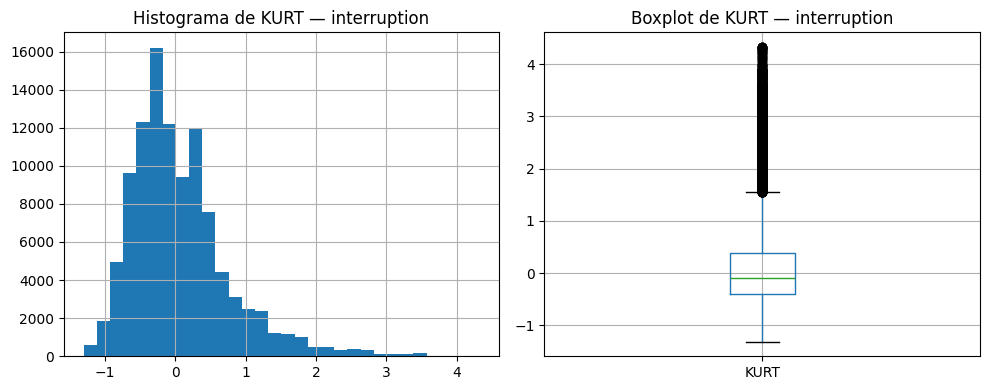

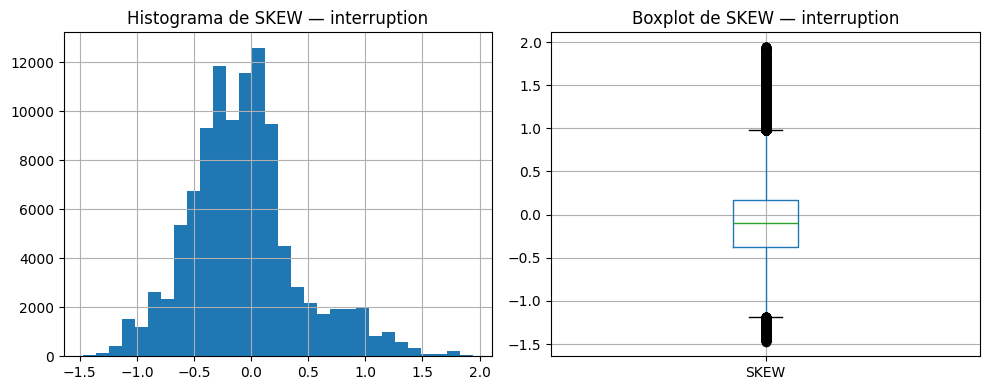

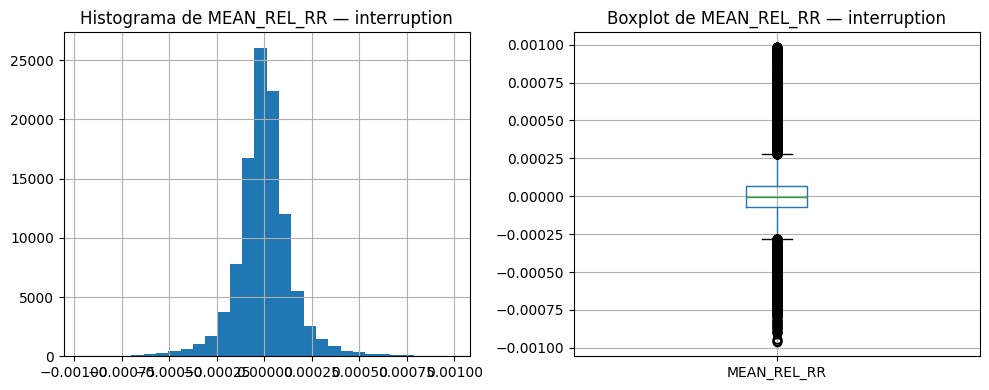

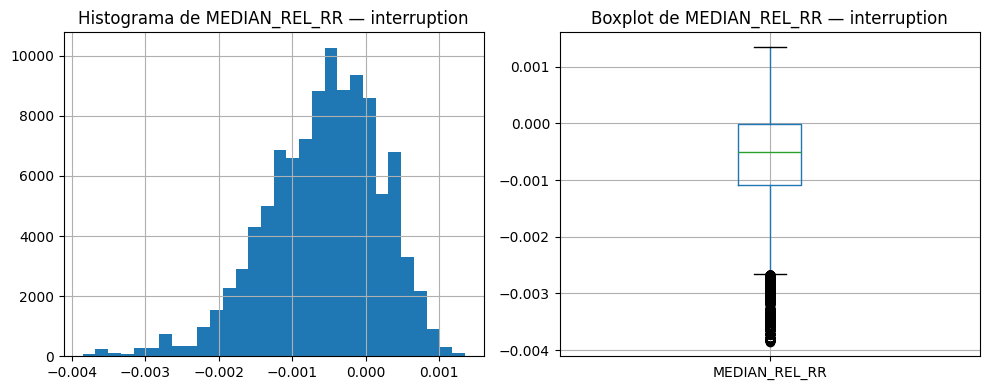

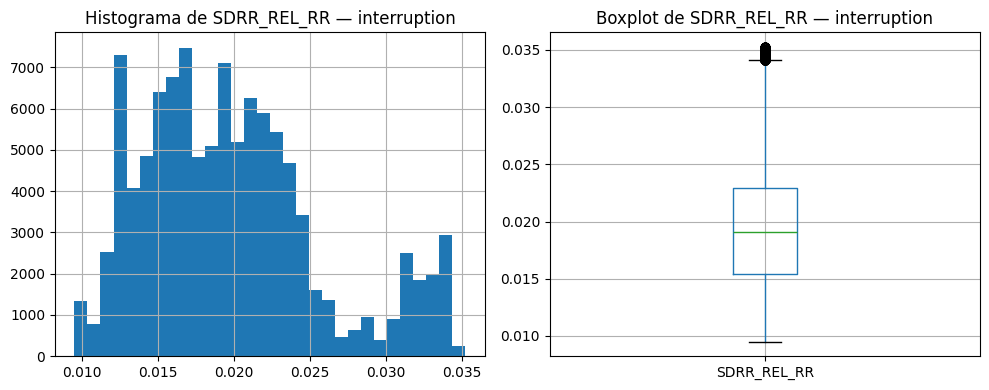

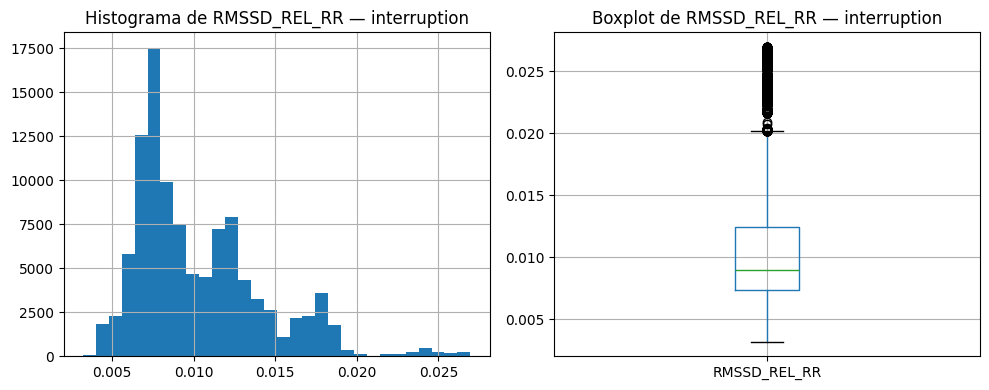

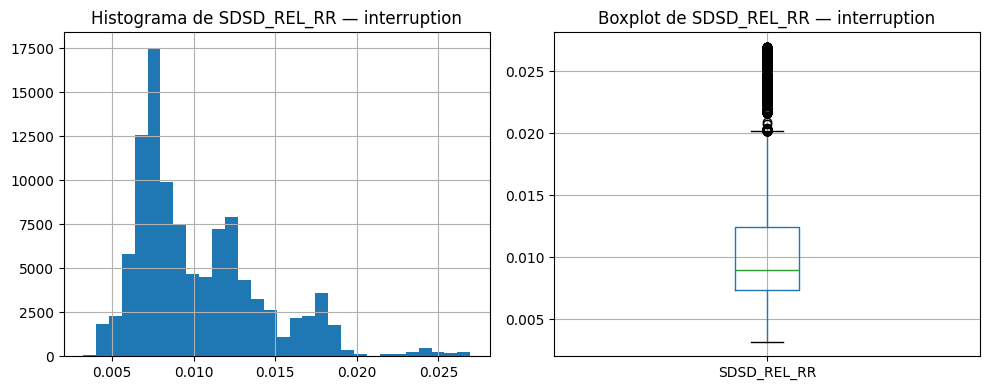

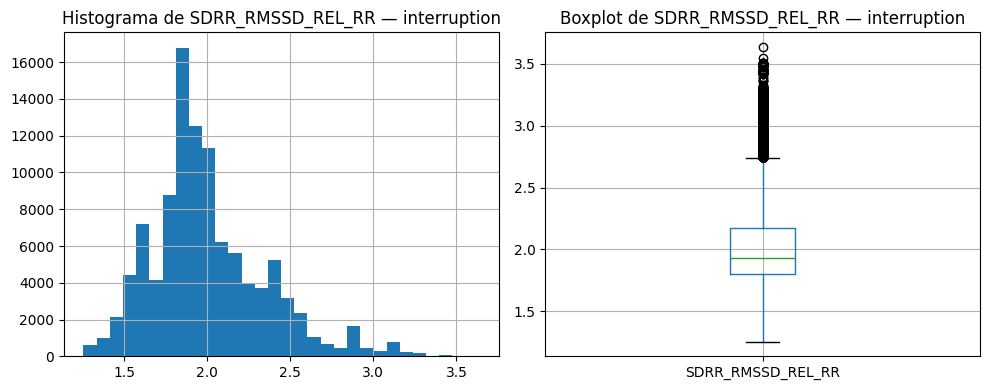

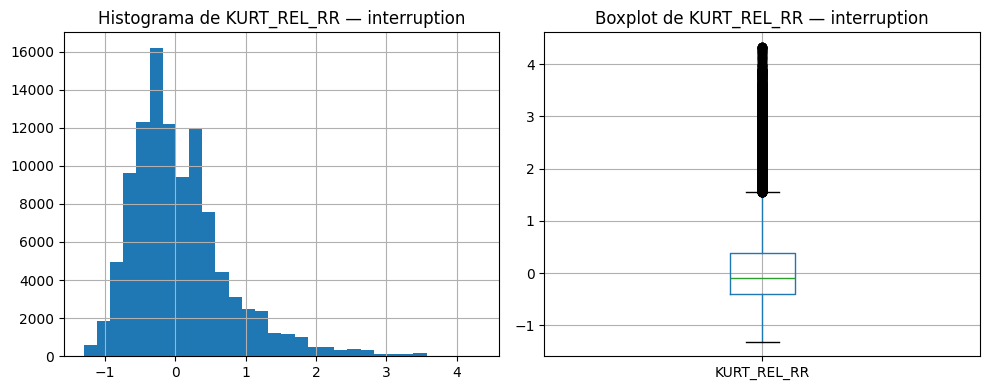

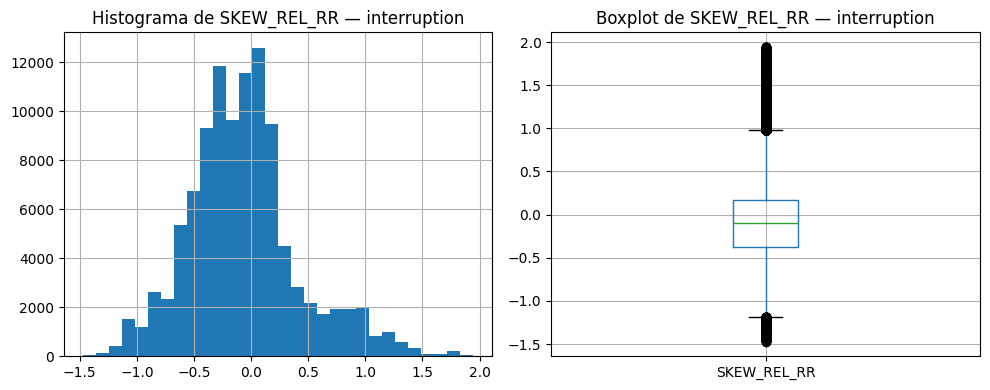


=== Condicao: time pressure ===


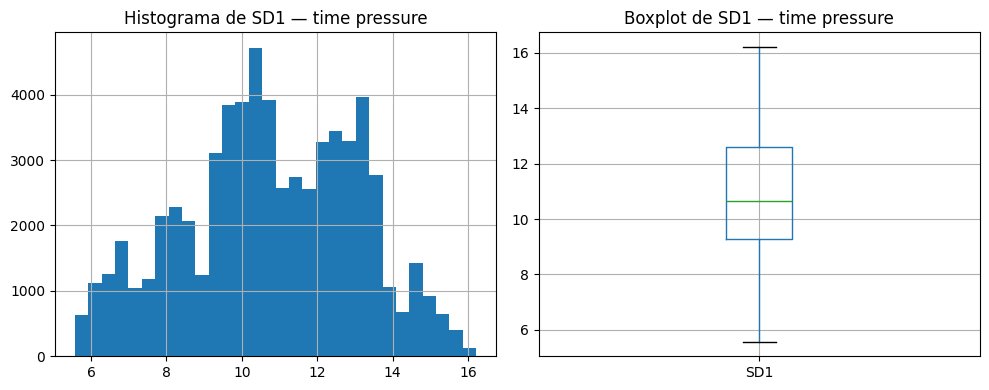

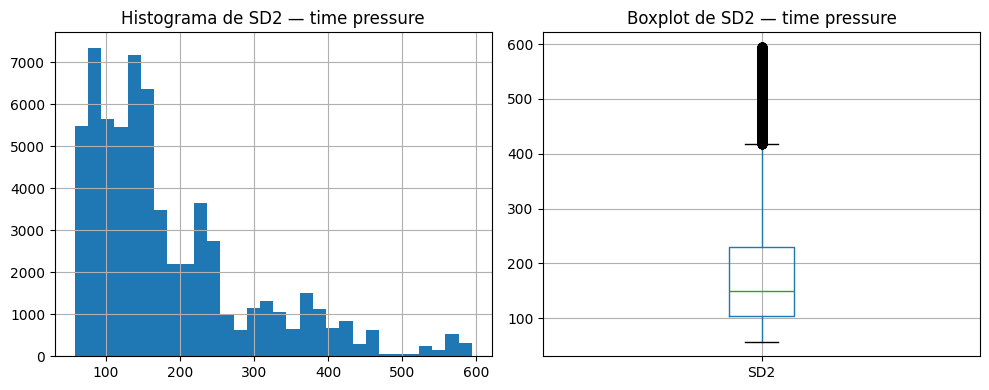

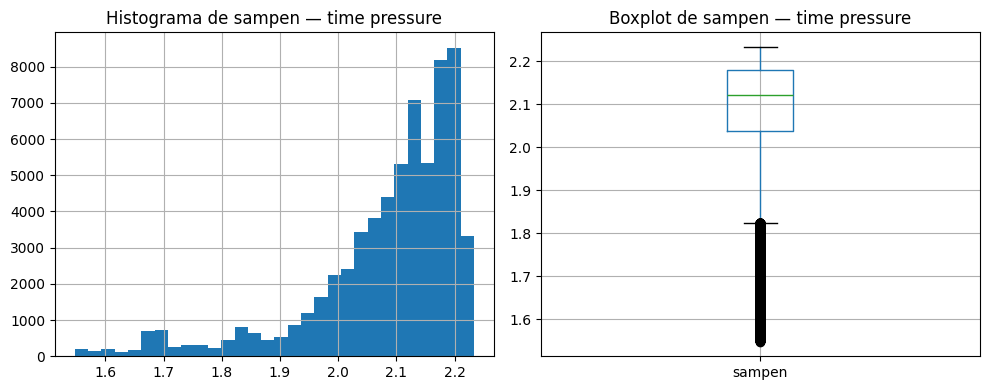

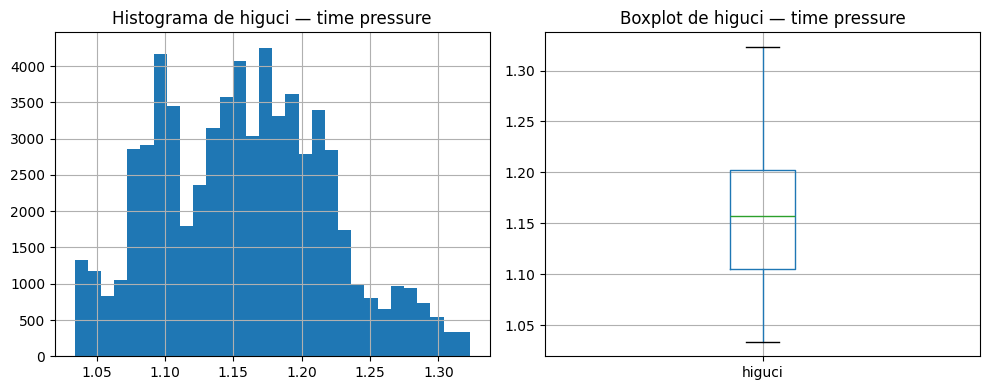

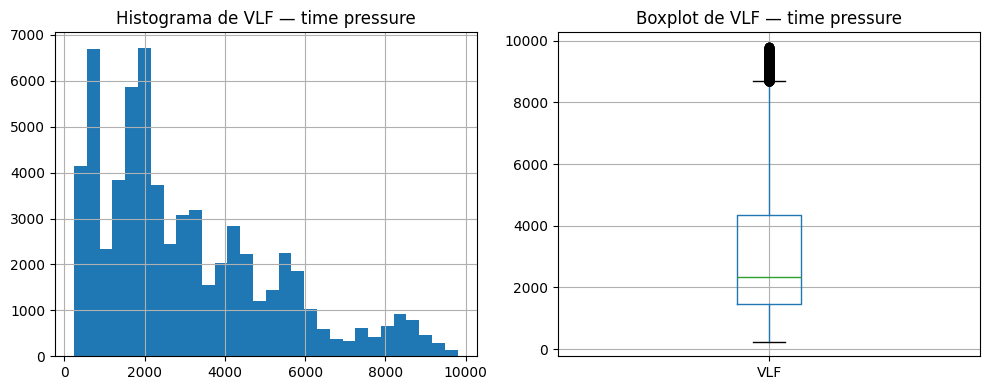

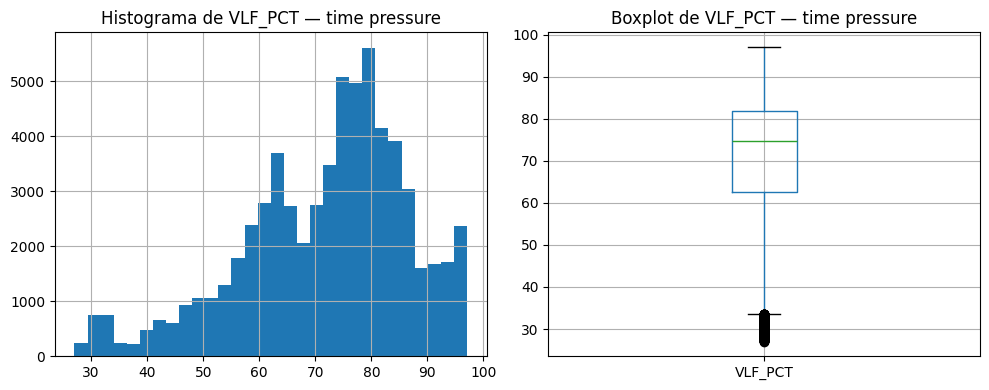

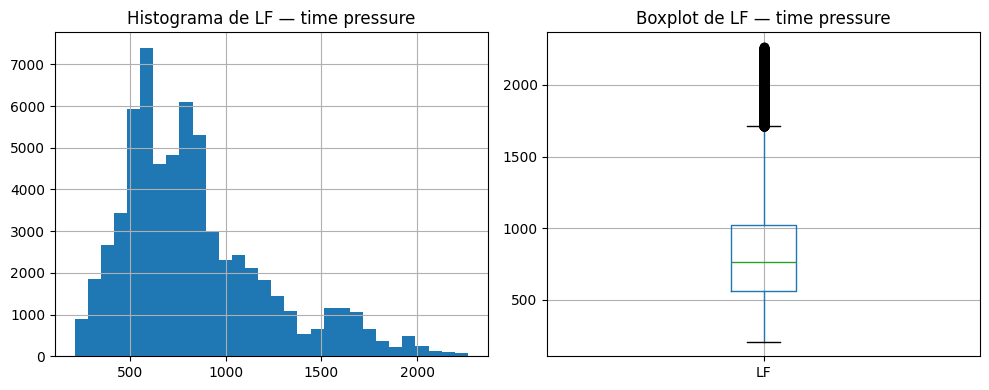

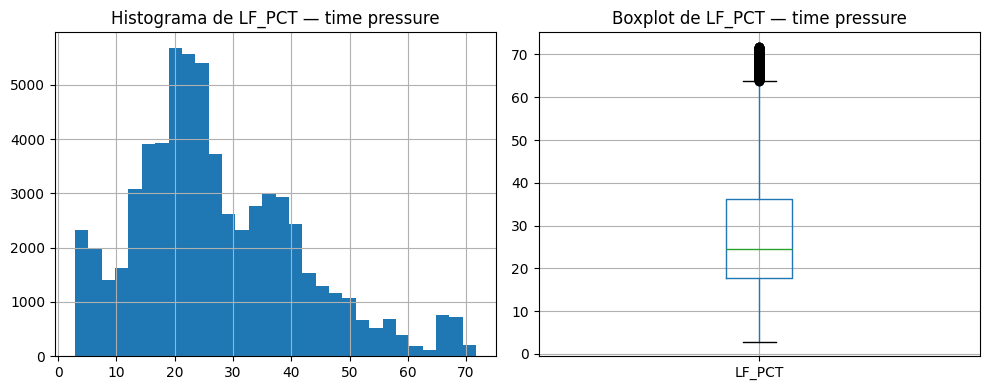

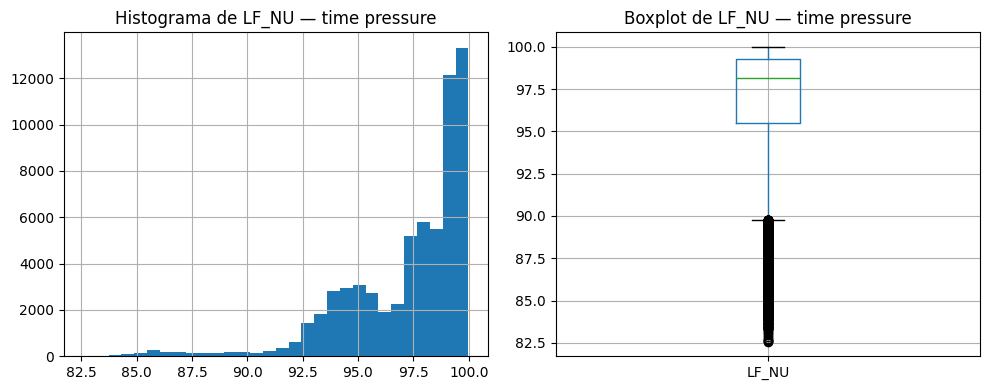

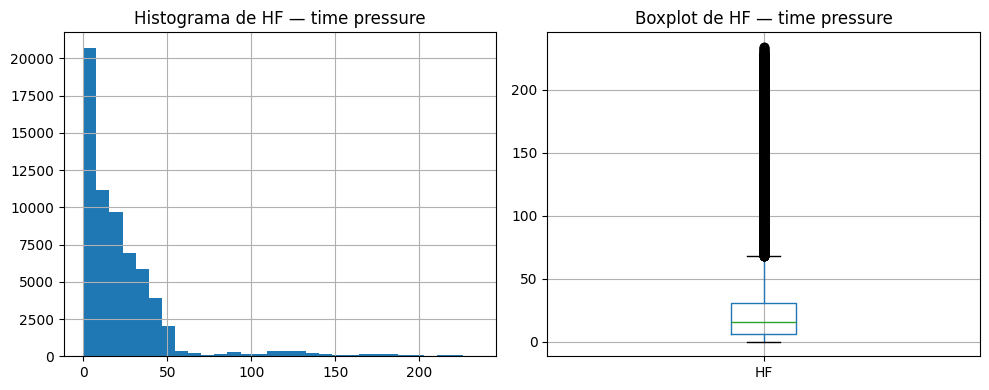

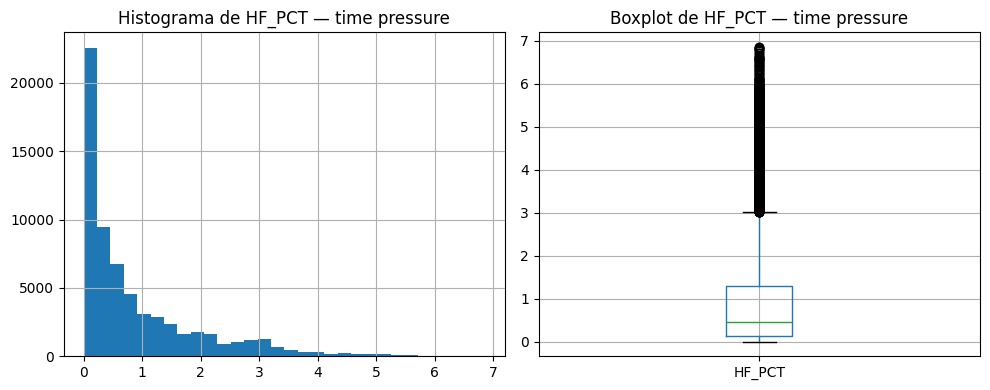

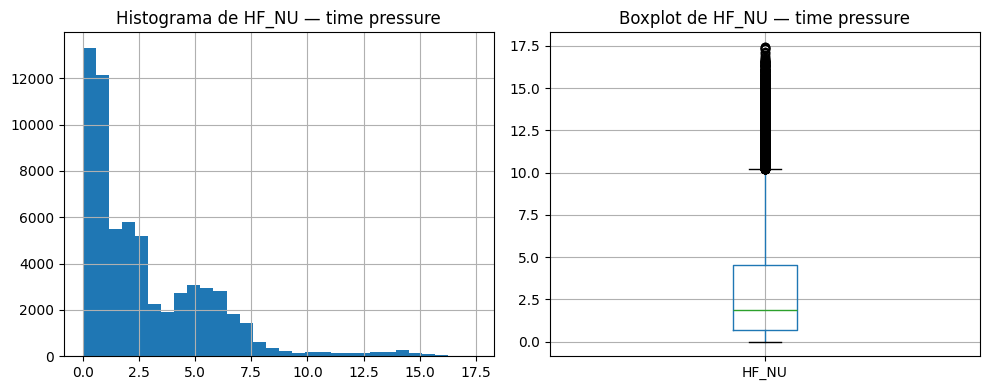

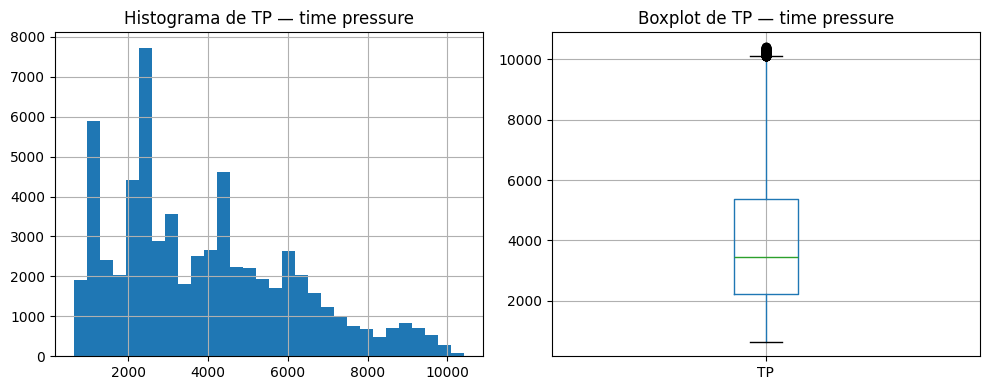

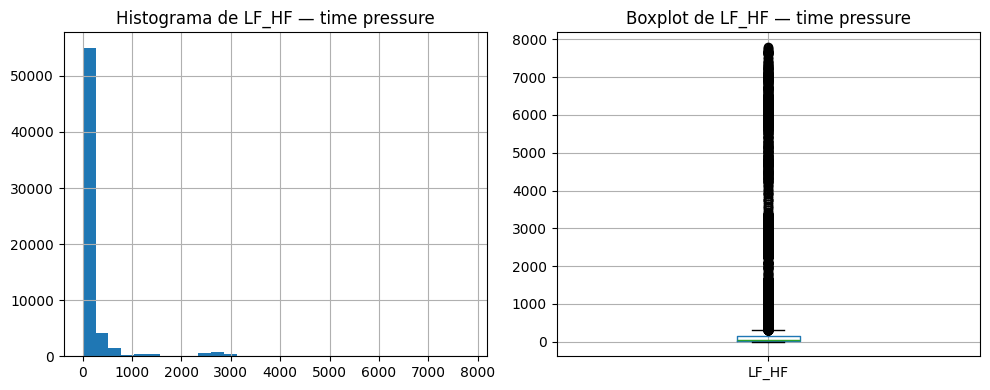

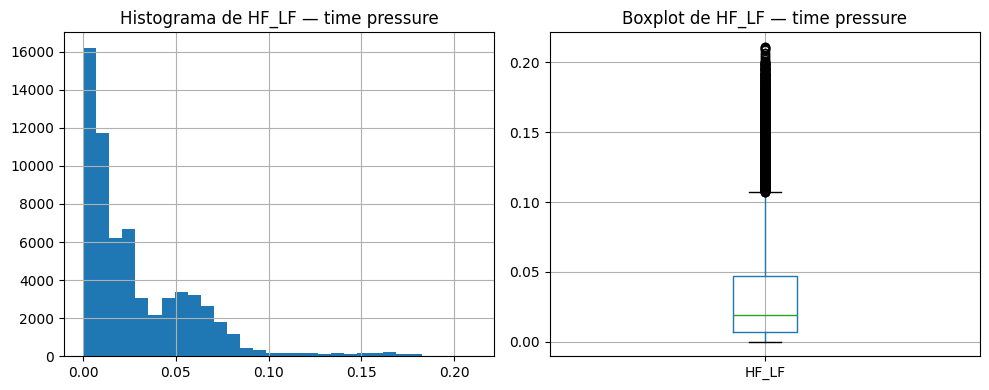

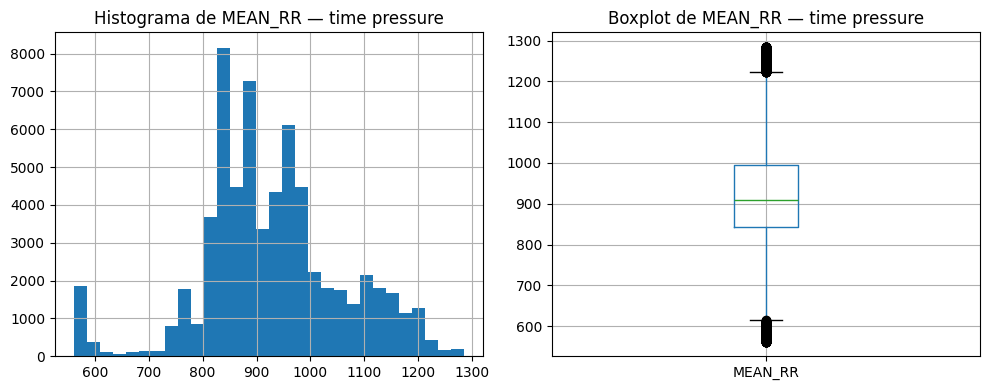

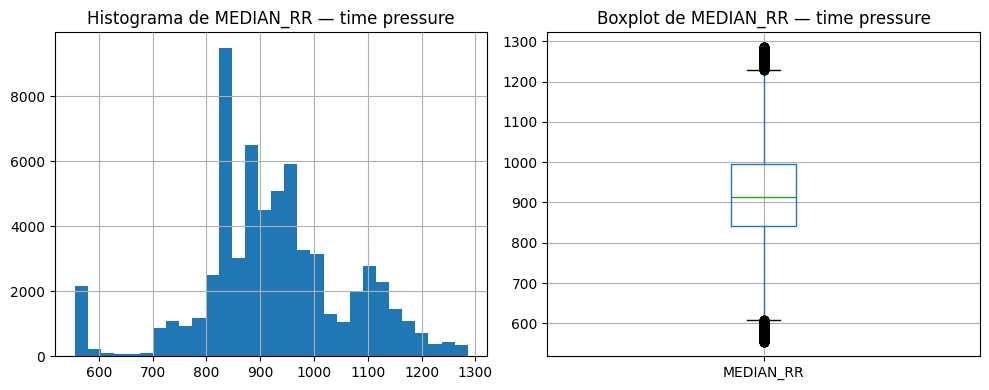

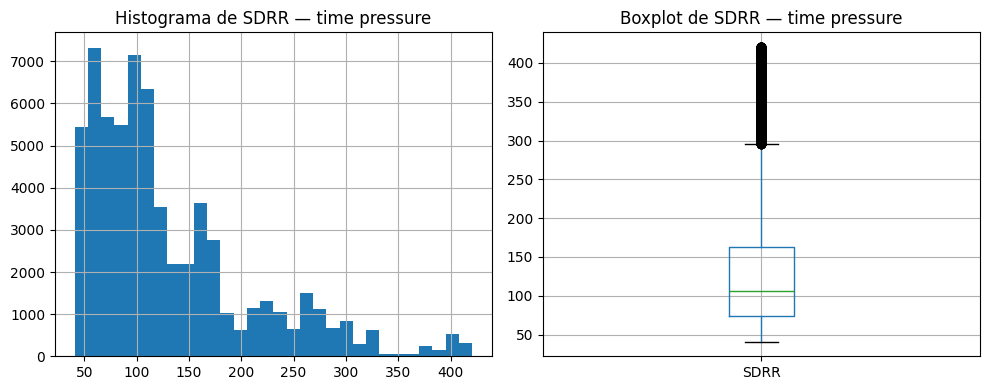

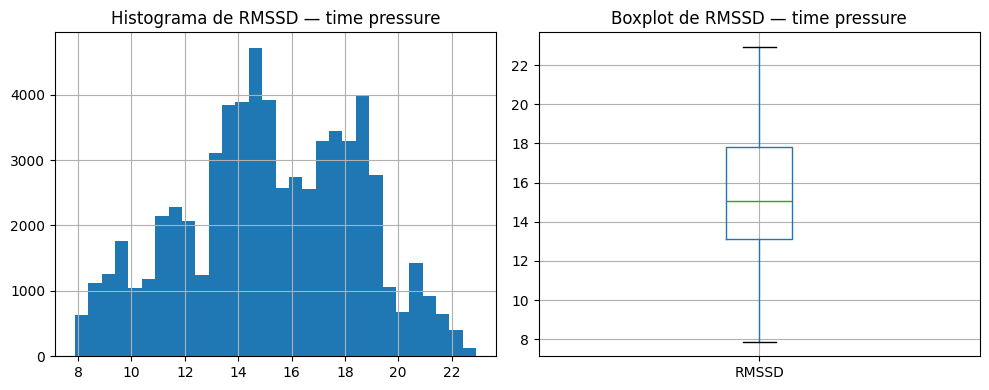

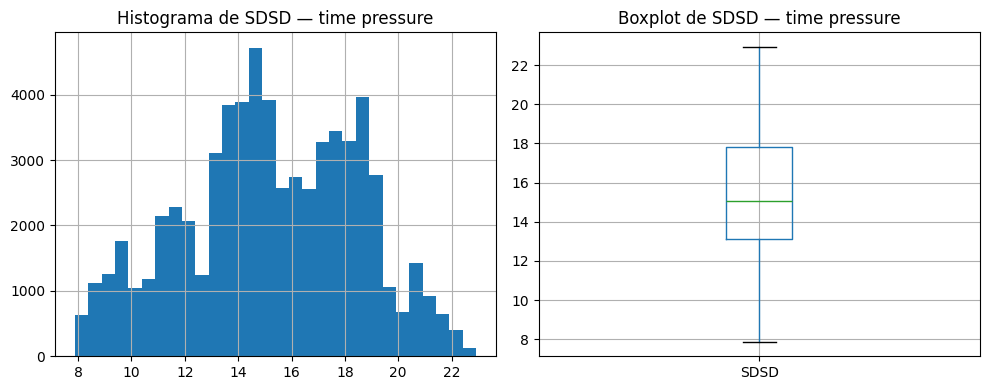

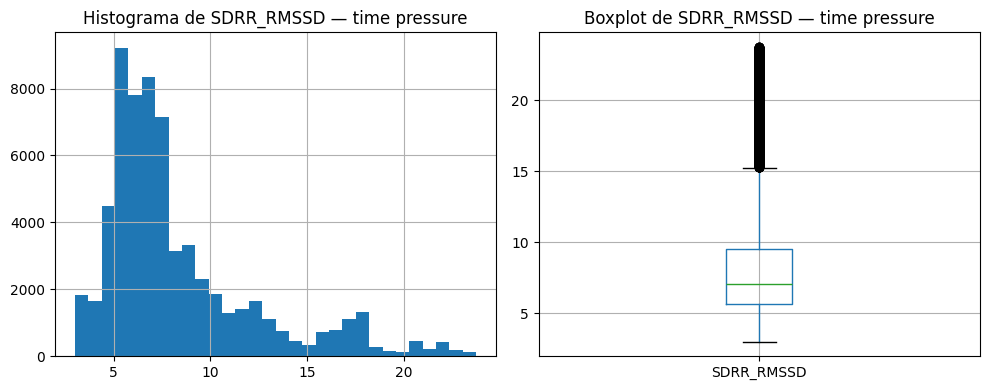

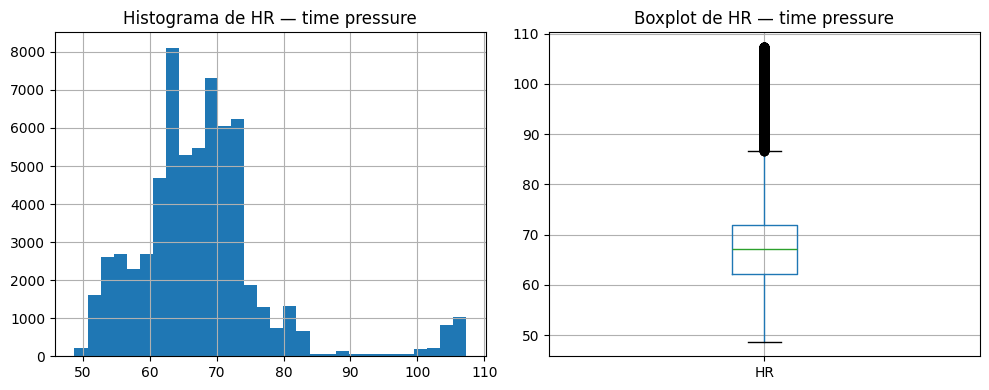

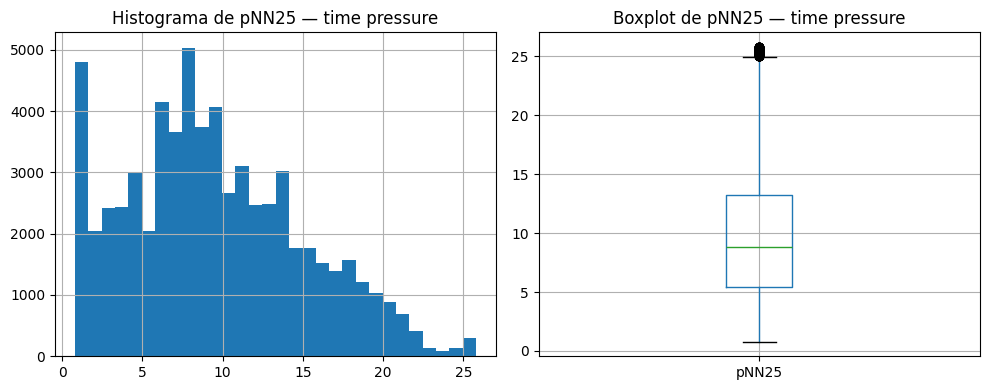

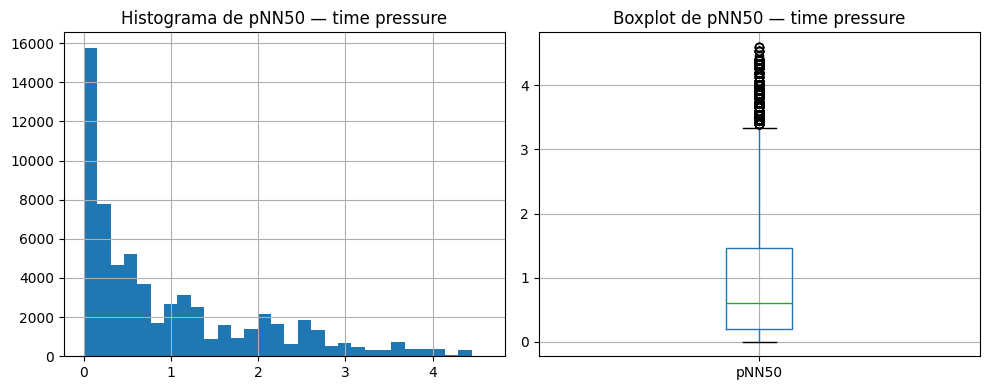

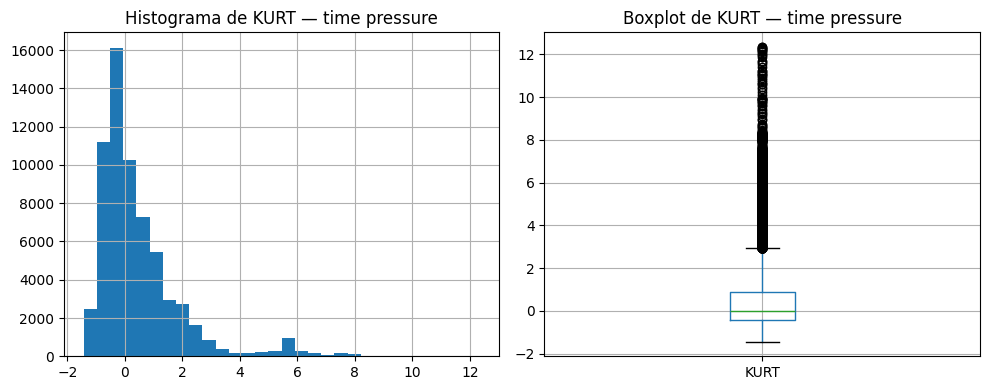

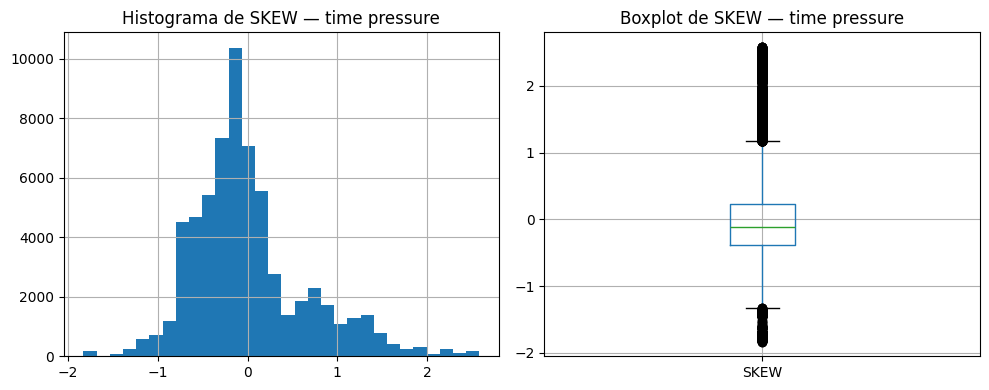

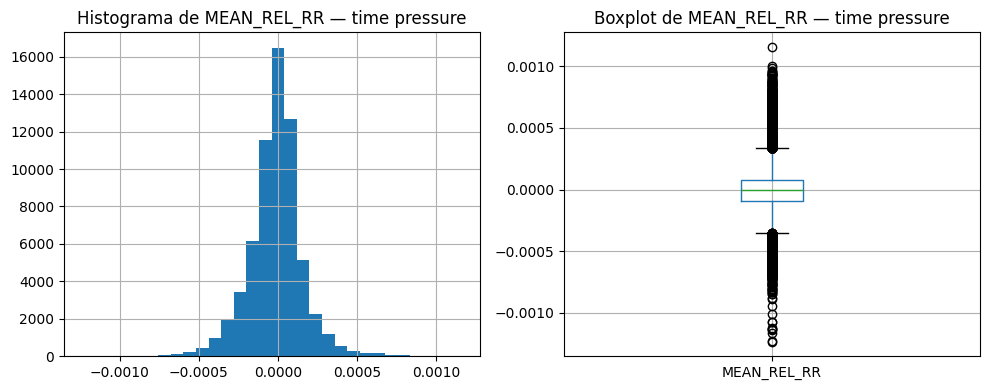

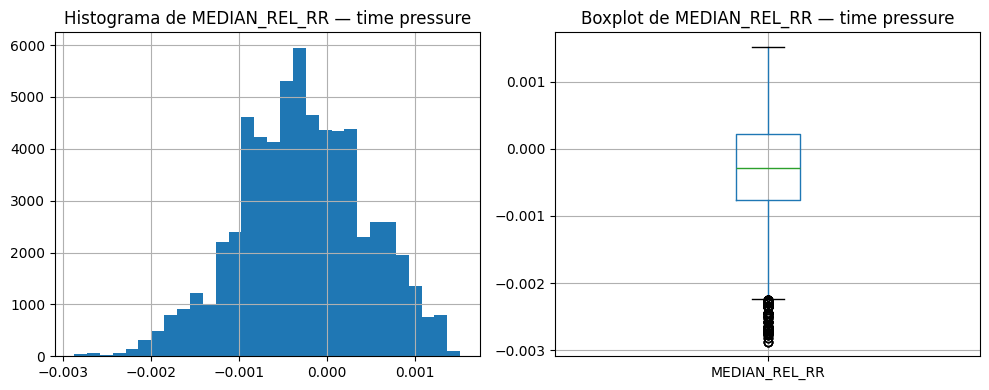

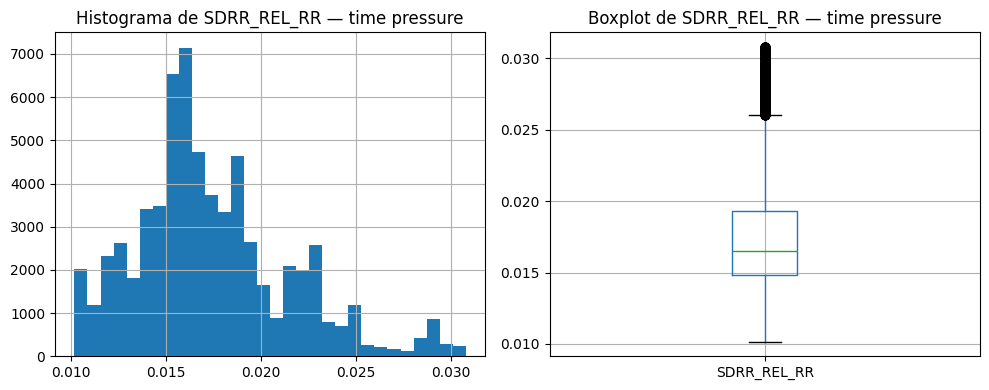

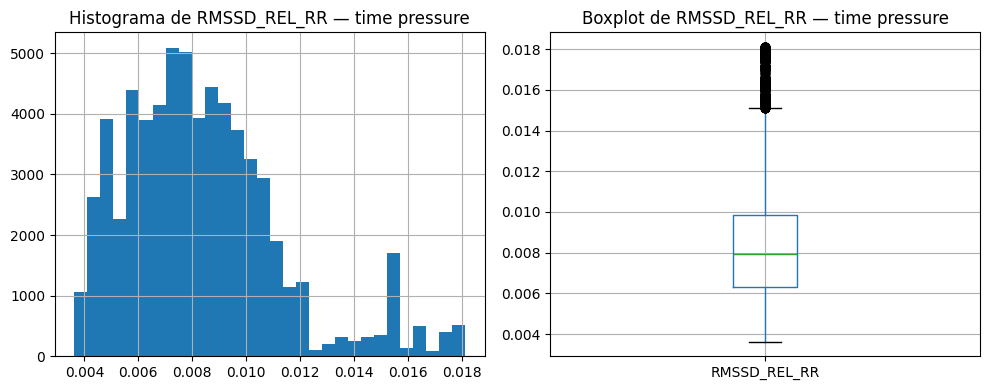

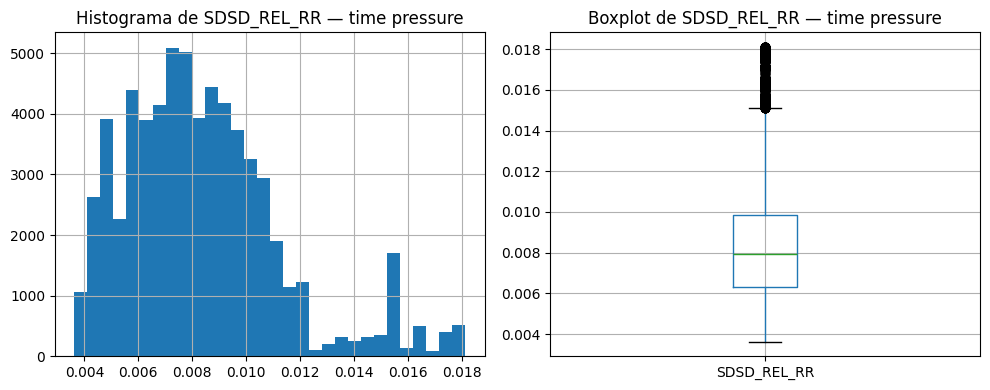

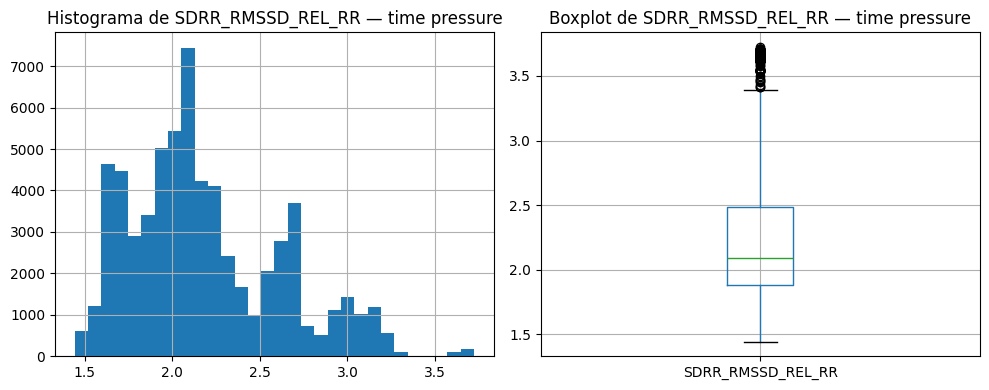

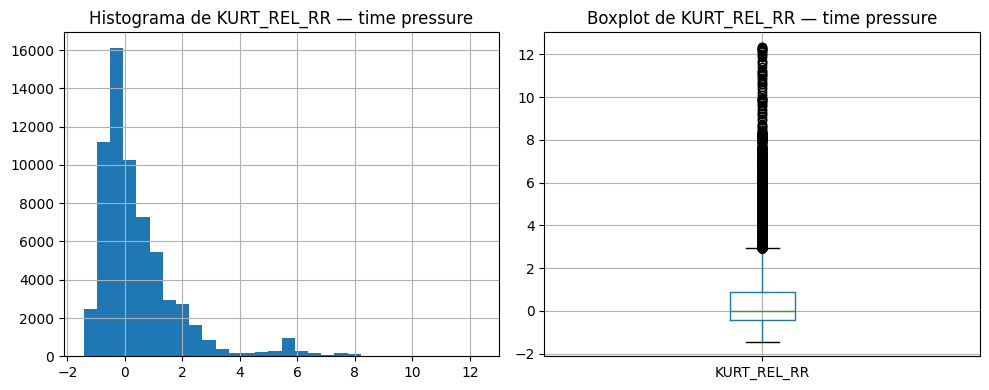

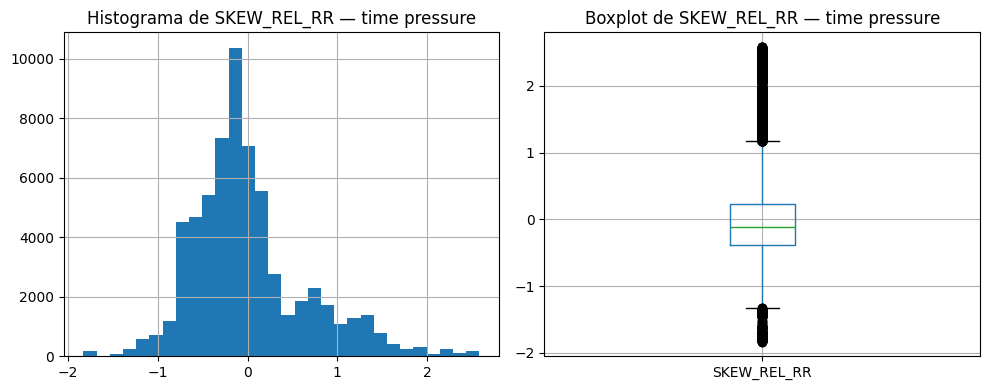

In [22]:
condicoes = df['condition'].unique()

for cond in condicoes:
    print(f"\n=== Condicao: {cond} ===")
    subset = df.loc[df['condition'].eq(cond)]

    for i in colunas_numericas:
        s = subset[i]

        plt.figure(figsize=(10,4))

        plt.subplot(1,2,1)
        s.hist(bins=30)
        plt.title(f'Histograma de {i} — {cond}')

        plt.subplot(1,2,2)
        subset.boxplot(column=[i])
        plt.title(f'Boxplot de {i} — {cond}')

        plt.tight_layout()
        plt.show()

Perform an unconditional bi-variate analysis of the predictors. Specifically, you
must plot the scatter plots between all pairs of predictors. For each point (observation), use colours or symbols to indicate the associated class label. Investigate the
existence of potential relationships between pairs of predictors and the presence of
potential outliers.


In [1]:

'''
for i in range(len(colunas_numericas)):
    for j in range(i + 1, len(colunas_numericas)):
        x = colunas_numericas[i]
        y = colunas_numericas[j]
        
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=df, x=x, y=y, hue='condition', alpha=0.7, edgecolor=None)
        plt.title(f'Dispersão entre {x} e {y}')
        plt.legend(title='Classe', loc='best')
        plt.tight_layout()
        plt.show()
'''
# isso demorou 6 horas pra rodar na minha maquina e ainda não da pra ver todas as imagens '-'
# então, podemos ficar com as imagens do anderson

"\nfor i in range(len(colunas_numericas)):\n    for j in range(i + 1, len(colunas_numericas)):\n        x = colunas_numericas[i]\n        y = colunas_numericas[j]\n        \n        plt.figure(figsize=(6, 4))\n        sns.scatterplot(data=df, x=x, y=y, hue='condition', alpha=0.7, edgecolor=None)\n        plt.title(f'Dispersão entre {x} e {y}')\n        plt.legend(title='Classe', loc='best')\n        plt.tight_layout()\n        plt.show()\n"

Quantify linear dependence between predictors using pair-wise correlation
coefficients $ρ_{d_i,d_j}$,with $d_i$, $d_j = 1, . . . , D$. Either tabulate the correlation coefficients as a correlation matrix $ρ$ with $ρ(i, j) = ρ_{d_i,d_j}$, or show the matrix as an image.

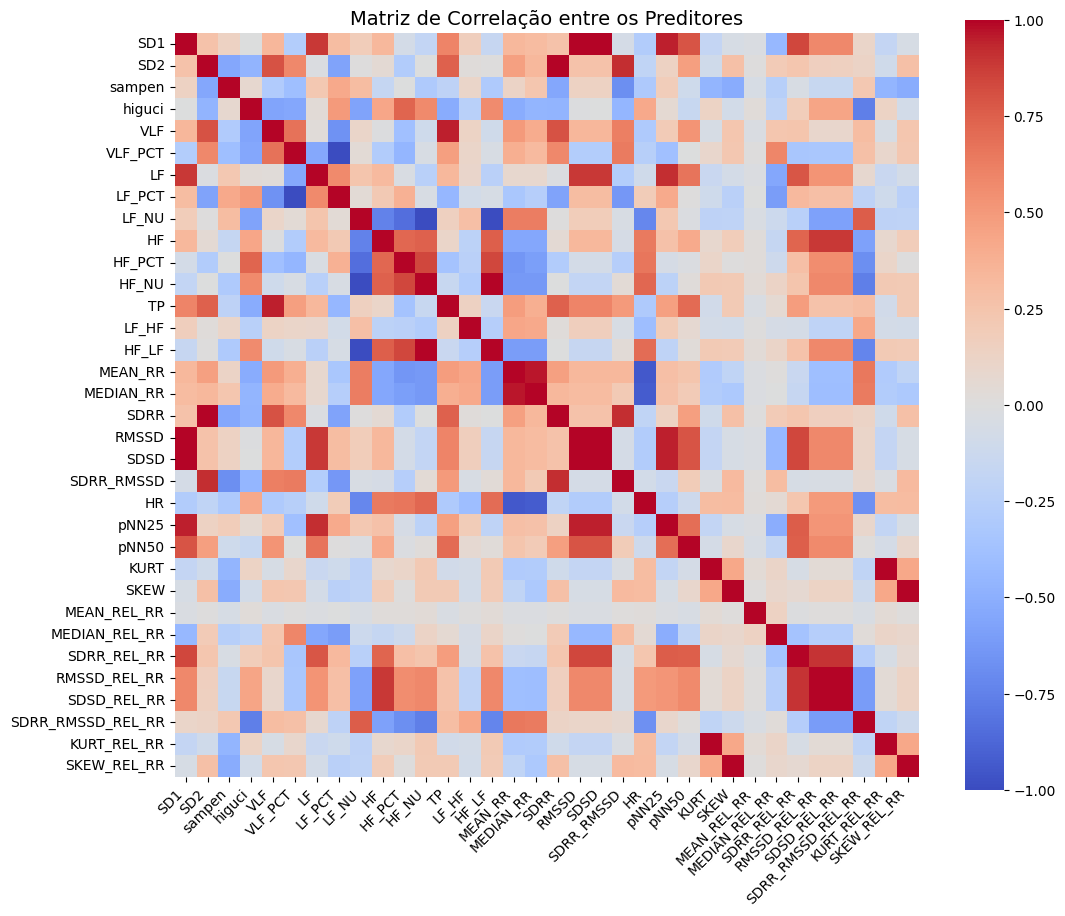

                        SD1       SD2    sampen    higuci       VLF   VLF_PCT  \
SD1                1.000000  0.260609  0.134970 -0.007754  0.341293 -0.278996   
SD2                0.260609  1.000000 -0.550036 -0.474222  0.798240  0.581071   
sampen             0.134970 -0.550036  1.000000  0.077104 -0.290457 -0.396915   
higuci            -0.007754 -0.474222  0.077104  1.000000 -0.570043 -0.551476   
VLF                0.341293  0.798240 -0.290457 -0.570043  1.000000  0.676628   
VLF_PCT           -0.278996  0.581071 -0.396915 -0.551476  0.676628  1.000000   
LF                 0.887012 -0.020562  0.222920  0.035736  0.026521 -0.541976   
LF_PCT             0.299684 -0.576758  0.415872  0.496831 -0.664830 -0.995240   
LF_NU              0.185263  0.002995  0.304454 -0.577690  0.105044  0.046868   
HF                 0.332324  0.048295 -0.171254  0.434092 -0.010441 -0.283068   
HF_PCT            -0.072056 -0.281651 -0.007106  0.727750 -0.389684 -0.460465   
HF_NU             -0.185263 

In [17]:
# Calcular a matriz de correlação
matriz_corr = df[colunas_numericas].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(matriz_corr, cmap='coolwarm', square=True, cbar=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Matriz de Correlação entre os Preditores", fontsize=14)
plt.show()

print(matriz_corr)